In [3]:
#import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [4]:
#set limits on display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [5]:
#read data
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
#Check dimensions
print("Number of Rows = ", df.shape[0])
print("Number of Columns = ", df.shape[1])

Number of Rows =  1460
Number of Columns =  81


In [7]:
#replace missing values or NA
df = pd.read_csv('train.csv', keep_default_na=False)
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [8]:
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [10]:
##now that all values are non null change data type columns
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')


In [11]:
#check data types now
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [12]:
df.describe()


Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.00

In [33]:
#check missing values
df.isna().sum()

#replace missing values
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

1.8828757597682129

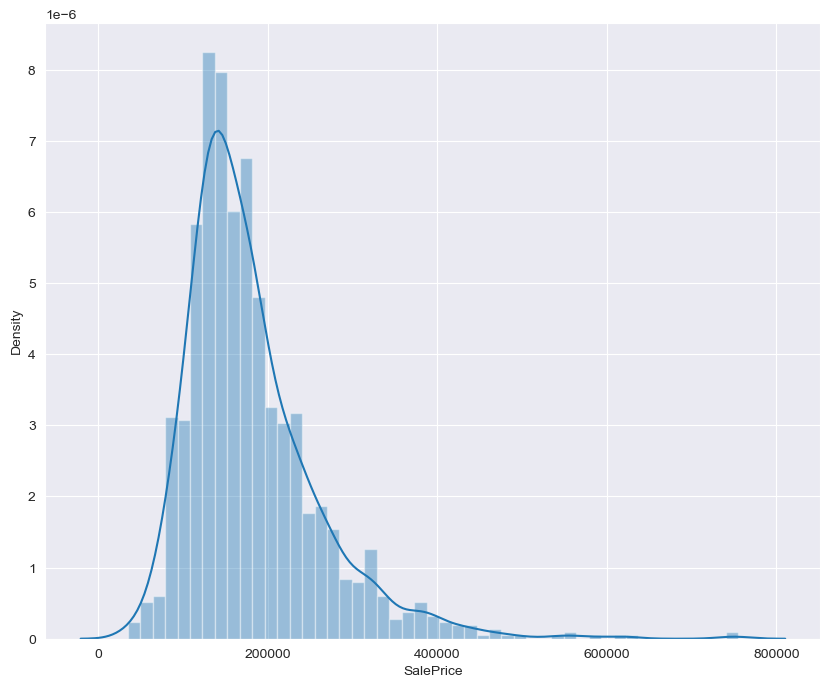

In [15]:
#show distribution of saleprice
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);
df['SalePrice'].skew()

In [16]:
#check kurtosis
df['SalePrice'].kurt()

#since target variable is skewed and highly peaked let us apply log
df['SalePrice'] = np.log(df['SalePrice'])


In [19]:
#now check kurtosis and skewness
df['SalePrice'].skew()


0.12133506220520406

In [18]:
df['SalePrice'].kurt()

0.8095319958036296

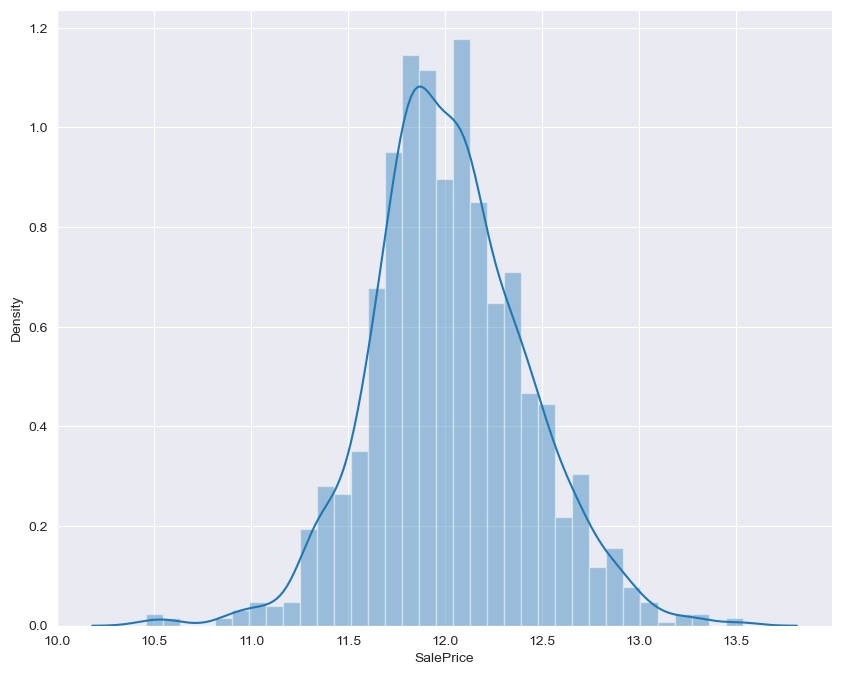

In [20]:
#now that kurtosis and skewness is low, plot the transformed variable
plt.figure(figsize=[10,8])
sns.distplot(df['SalePrice']);

In [21]:
#takeout numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()
#takeout categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageYrBlt GarageFinish  \
0          Gd        Typ        None     Attchd        2003          RFn   
1          TA        Typ          TA     Attchd        1976          RFn   
2          Gd        Typ          TA     Attchd        2001          RFn   
3          Gd        Typ          Gd     Detchd        1998          Unf   
4          Gd        Typ          TA     Attchd        2000          RFn   

  GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType  \
0         TA         TA          Y   None  None        None       WD   
1         TA         TA          Y   None  None        None       WD   
2         TA         TA          Y   None  None        None       WD   
3         TA         TA          Y   None  None        None       WD   
4         TA         TA          Y   None  None        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

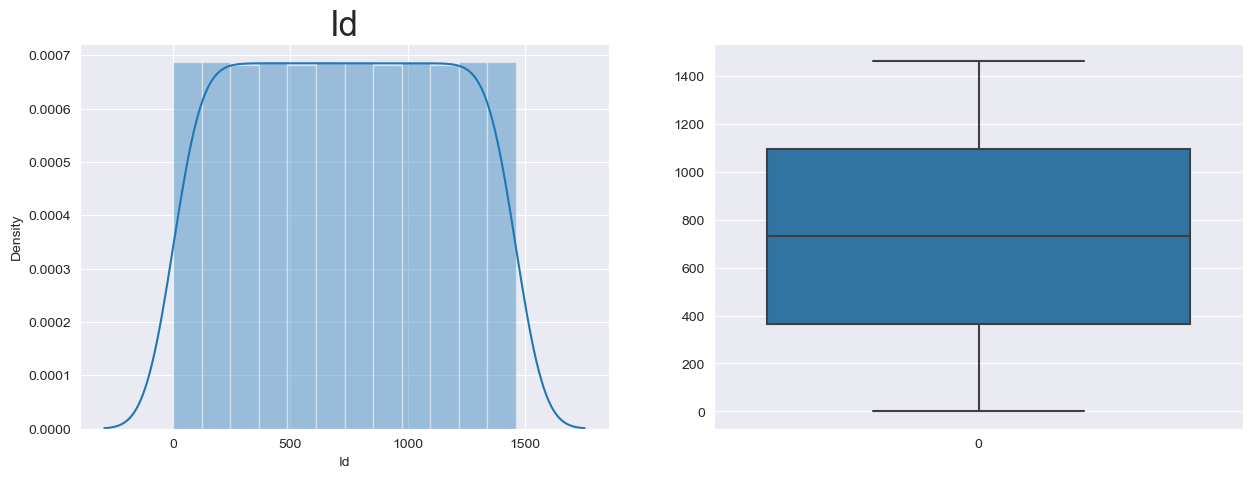

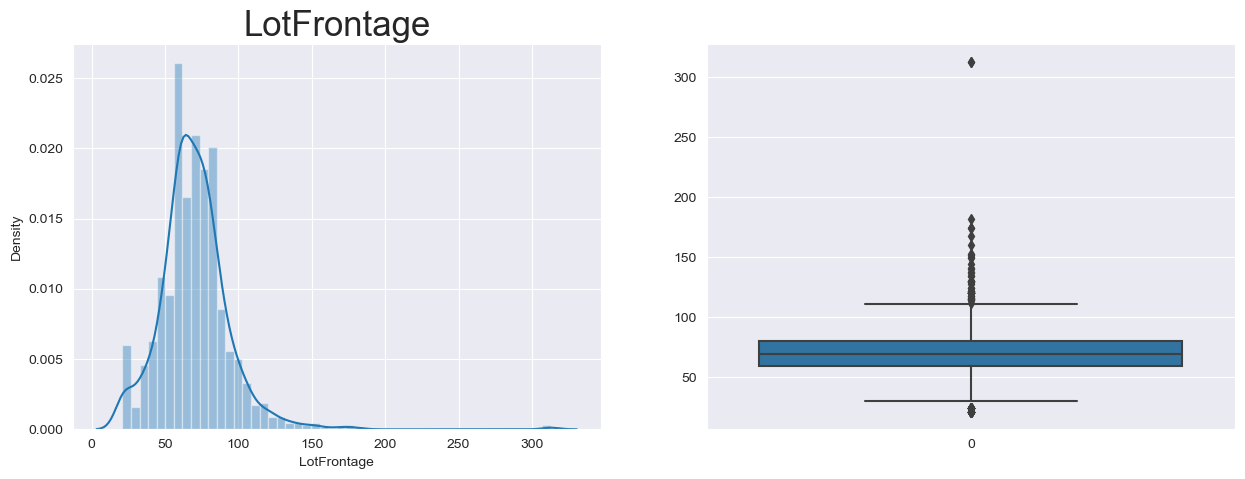

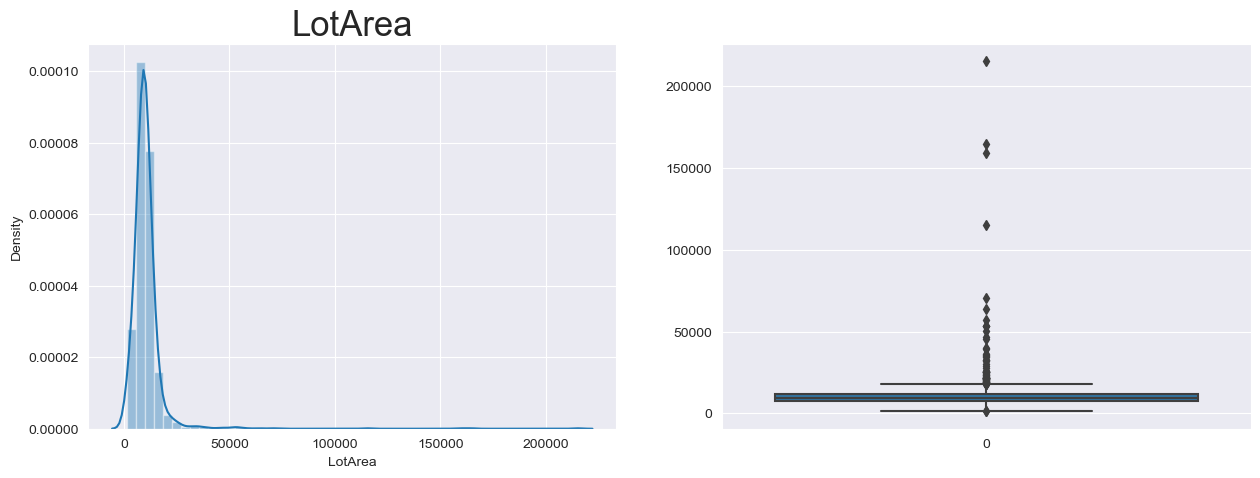

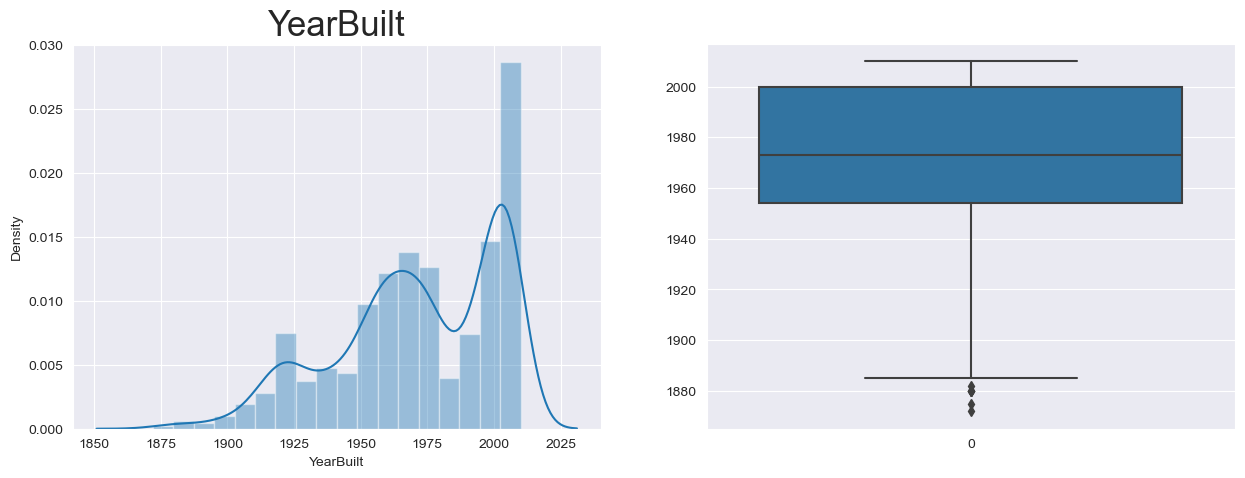

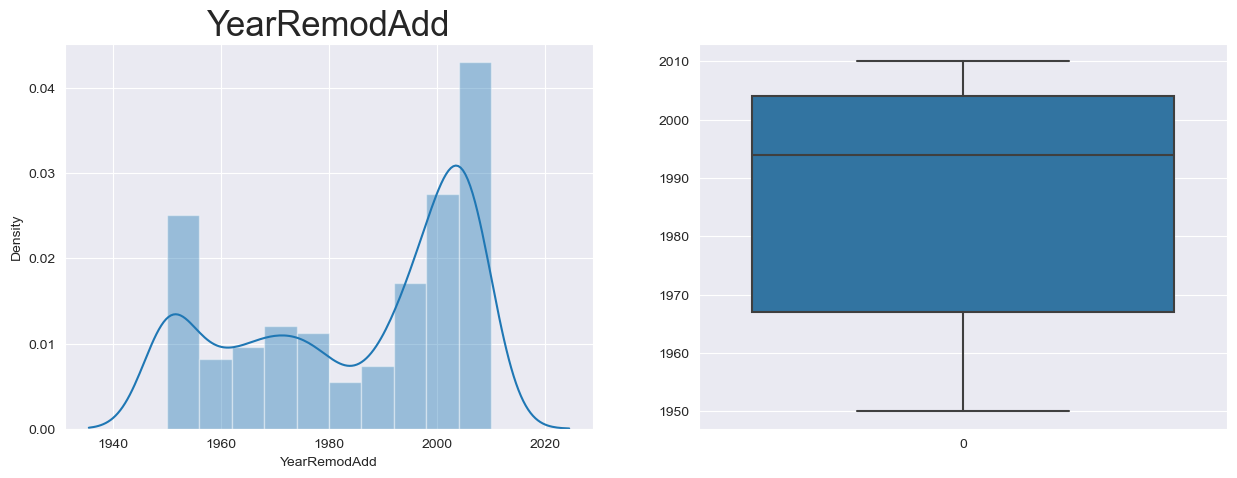

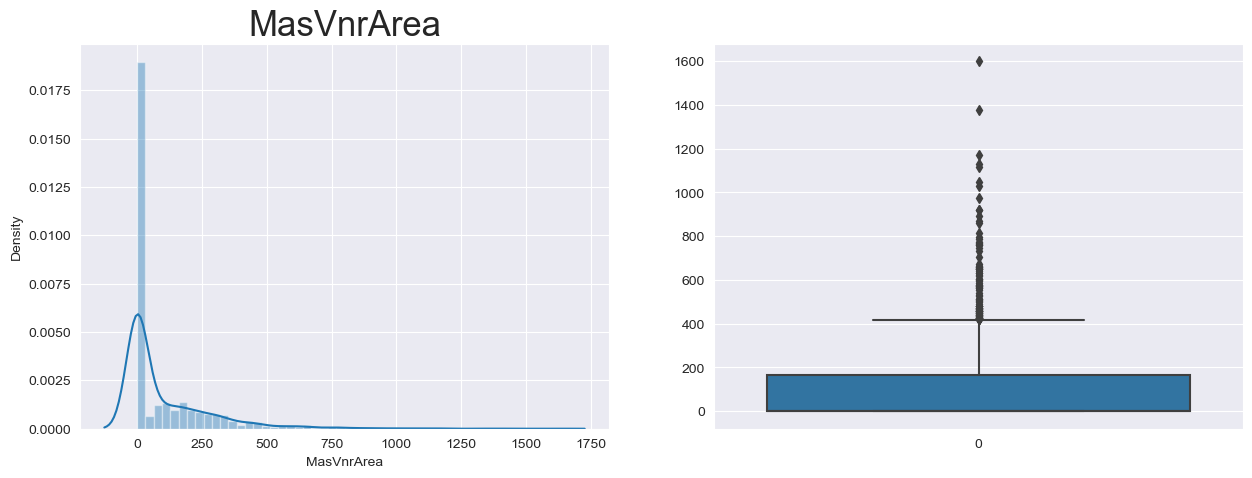

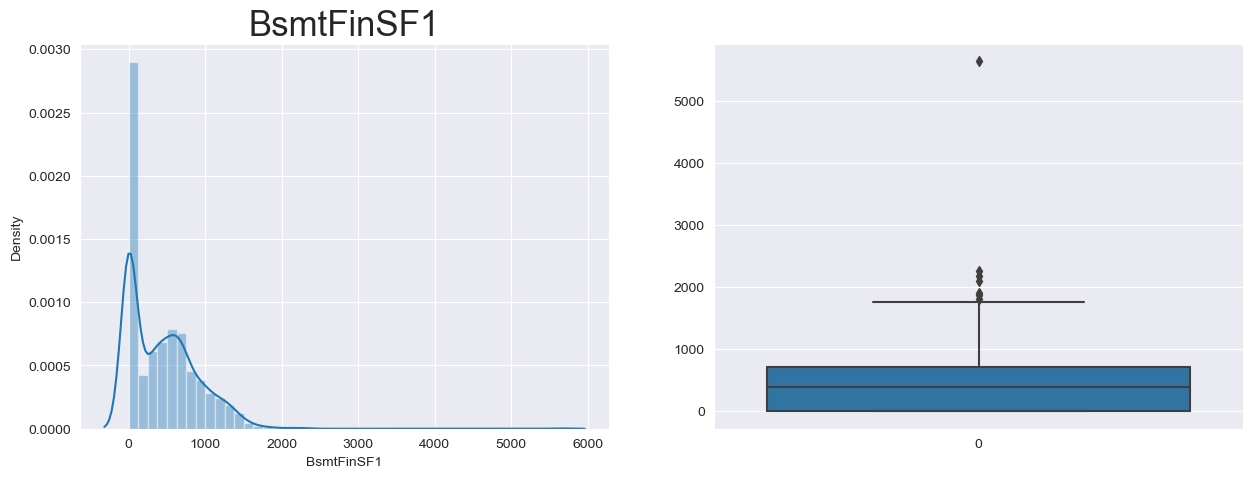

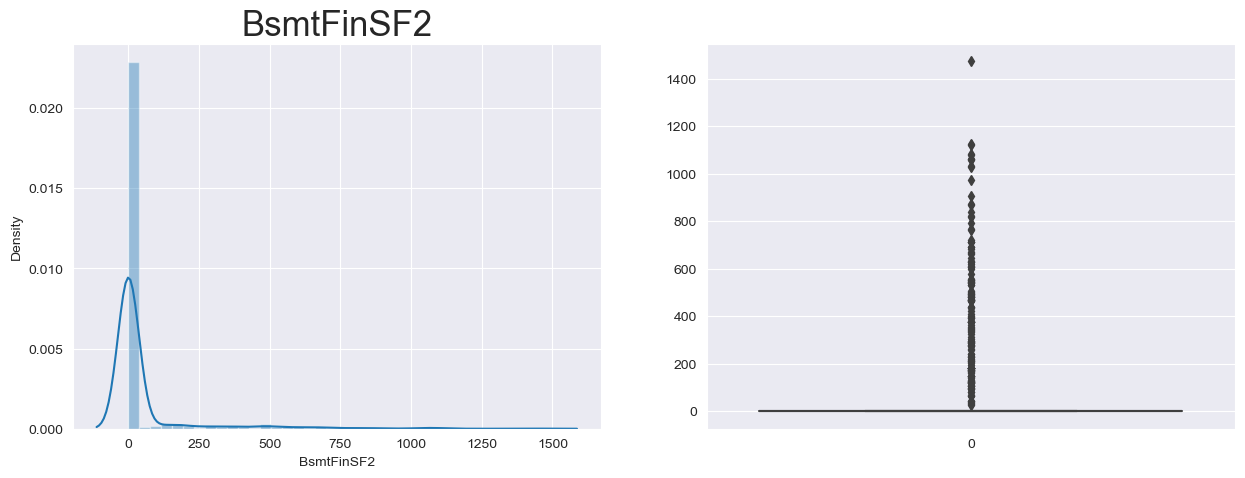

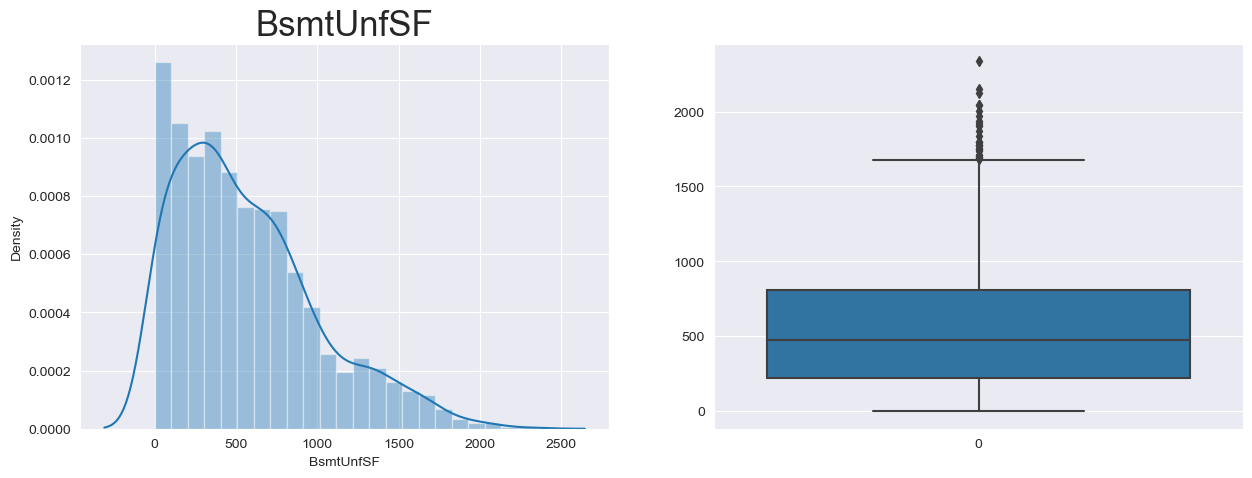

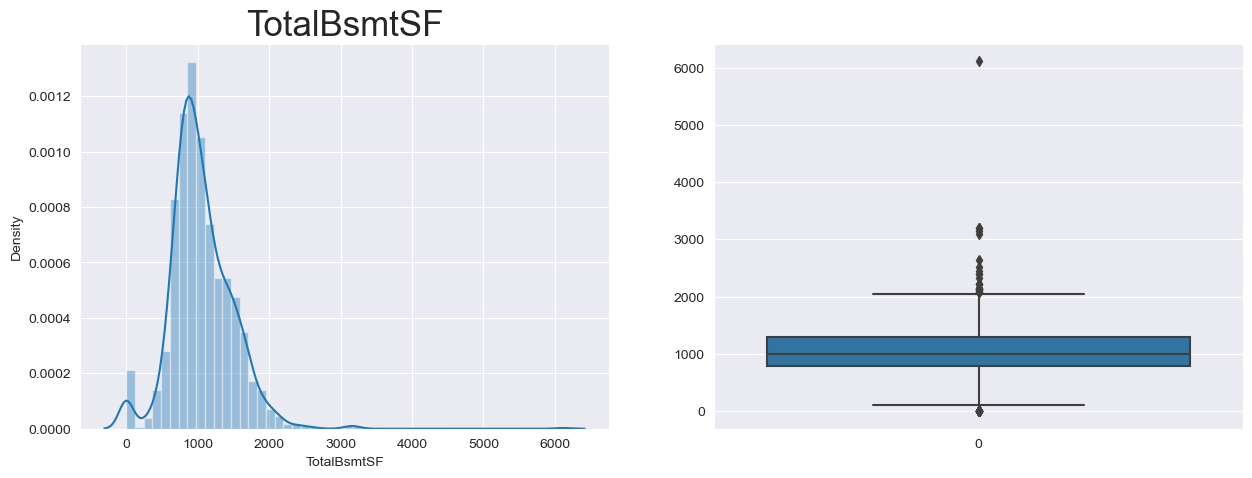

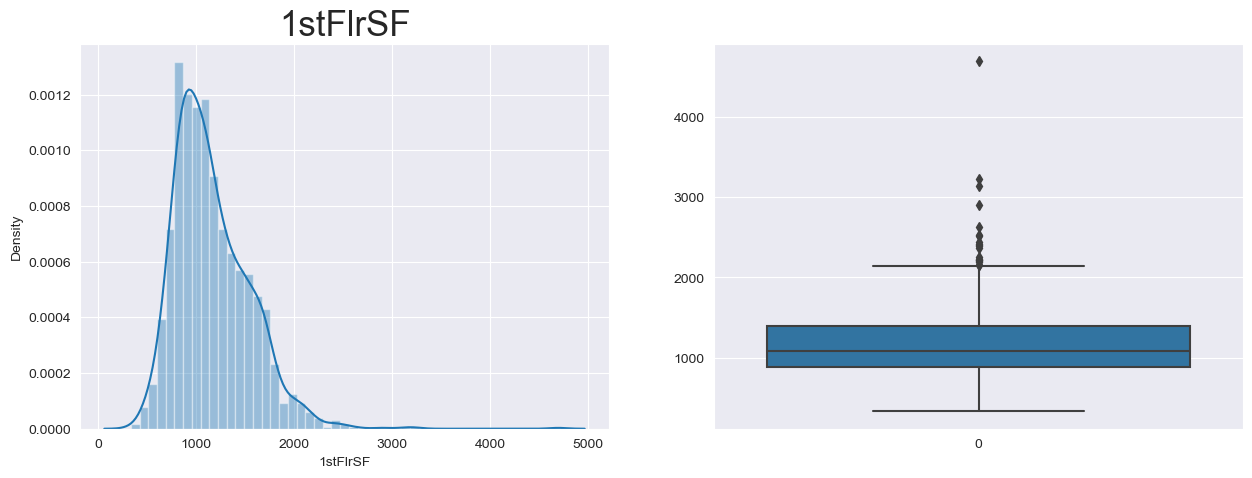

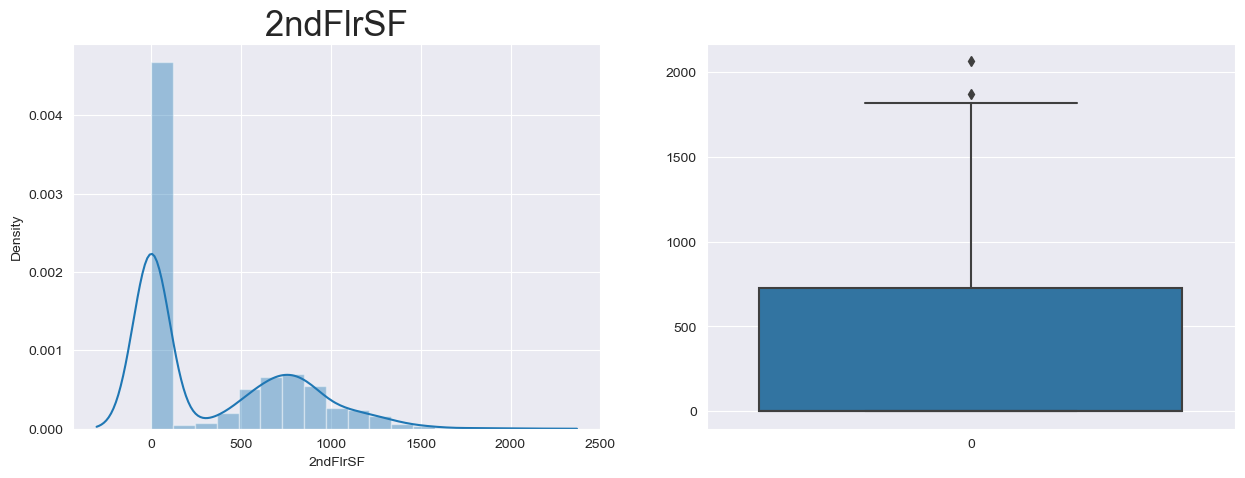

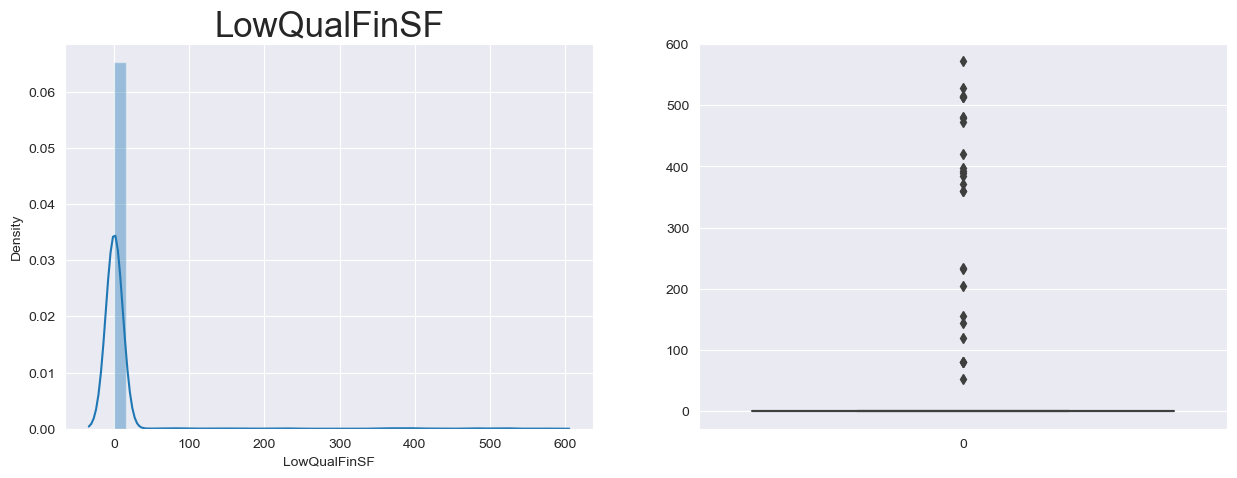

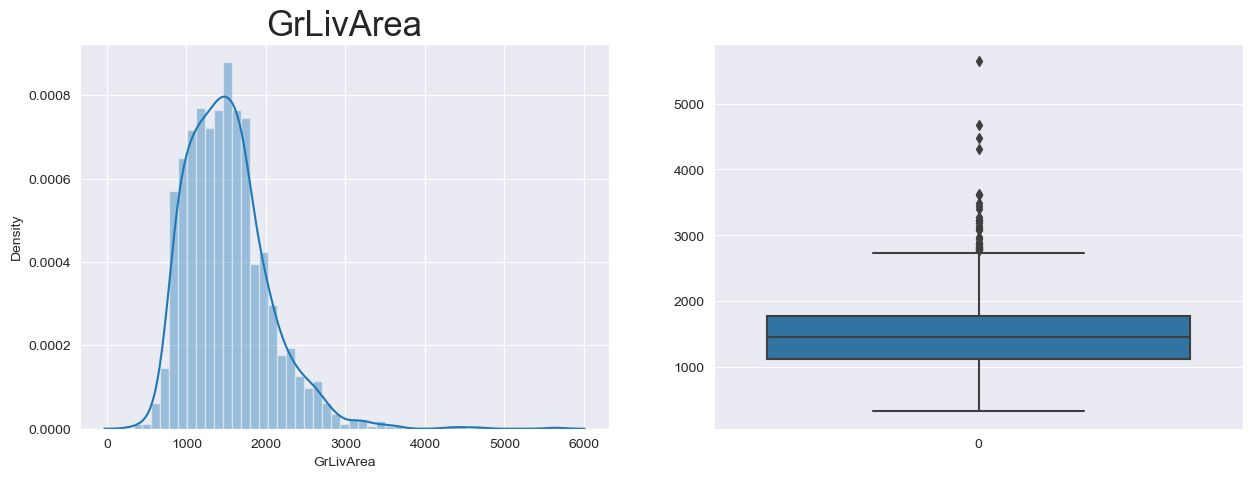

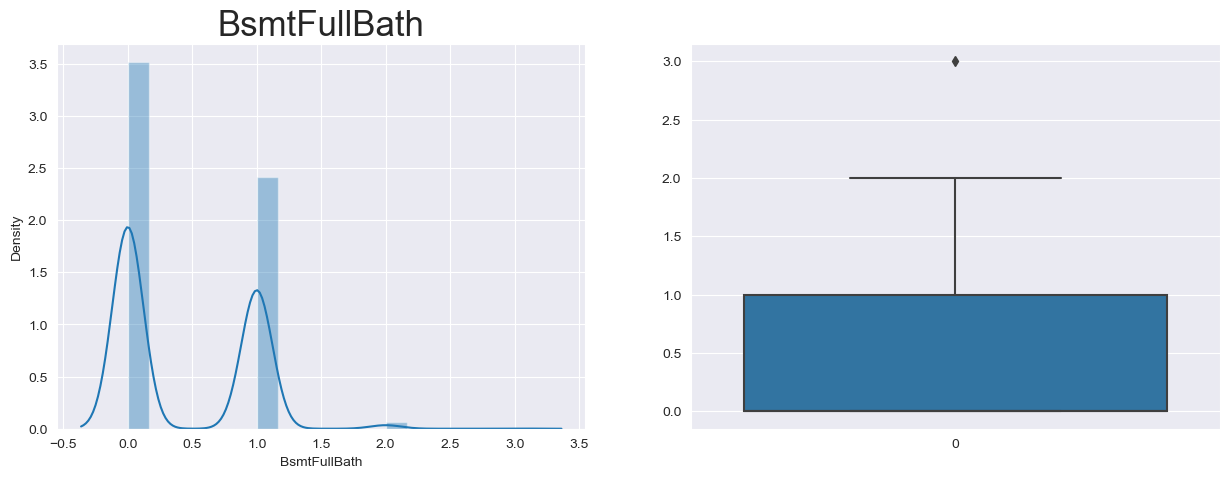

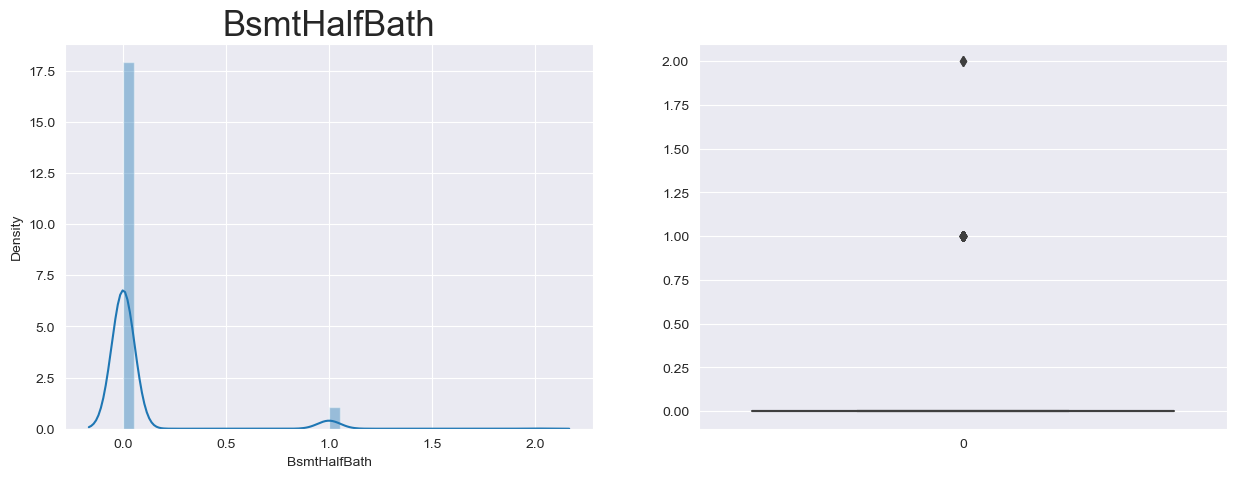

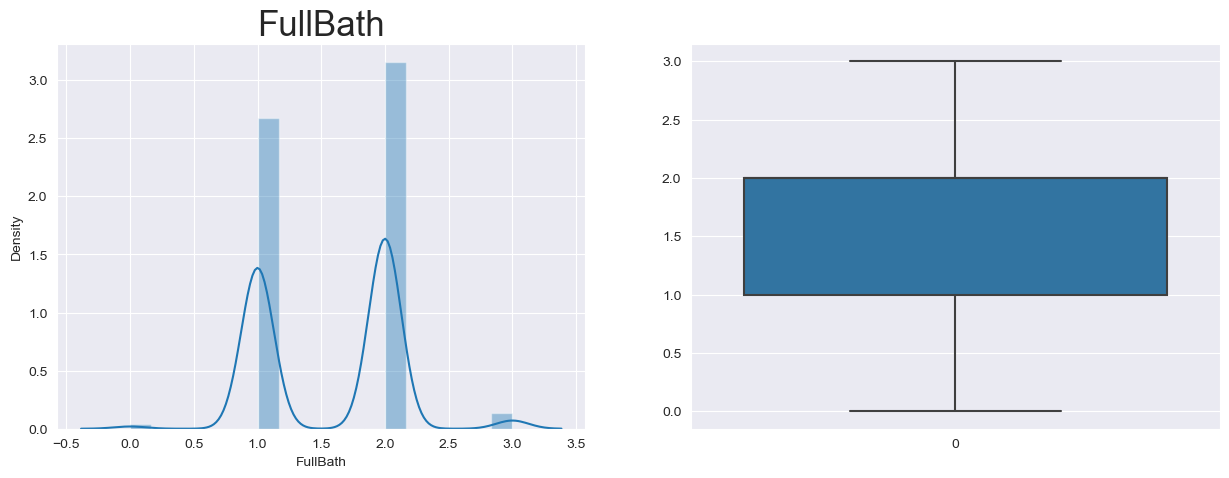

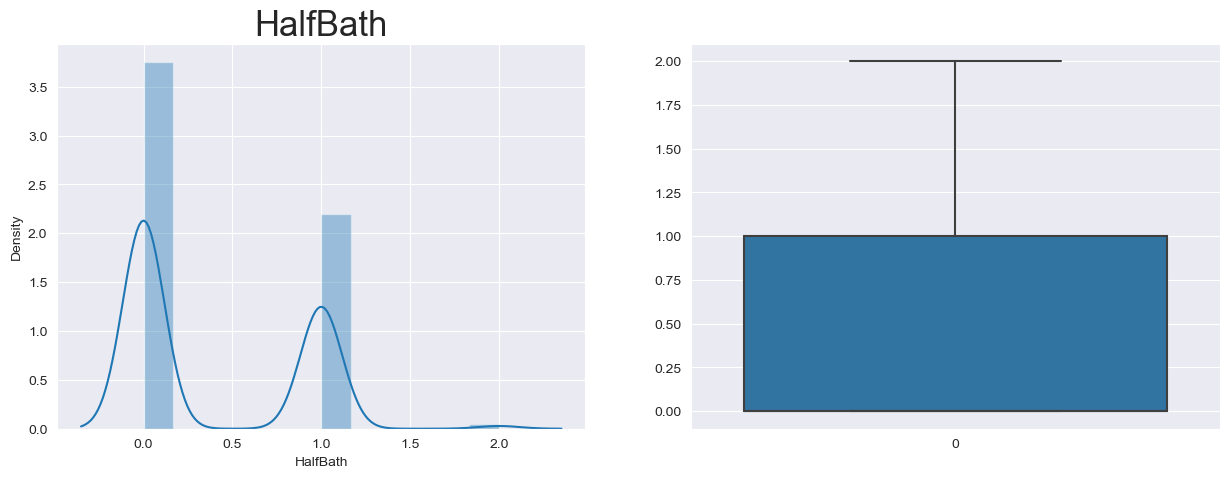

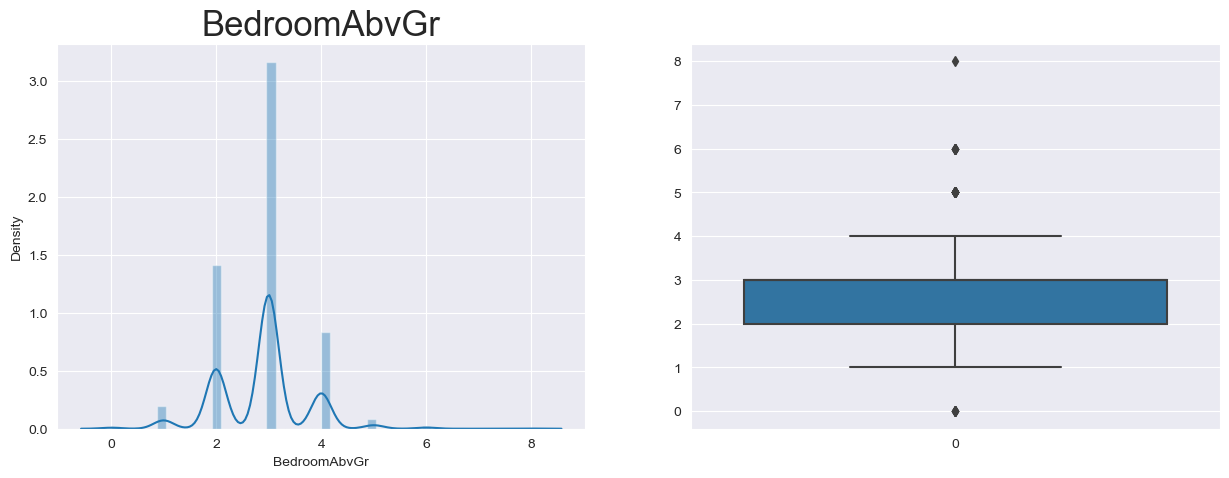

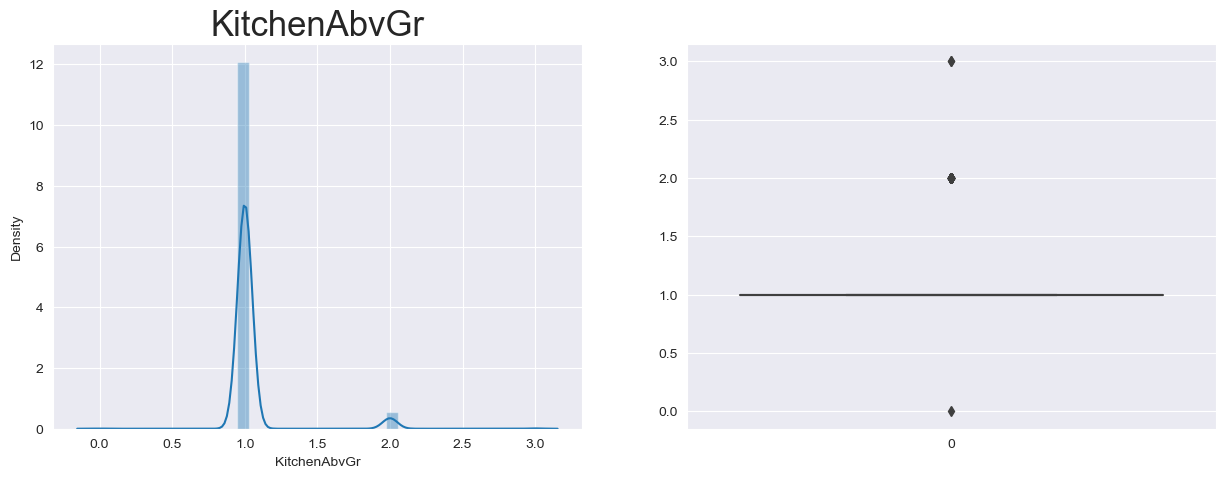

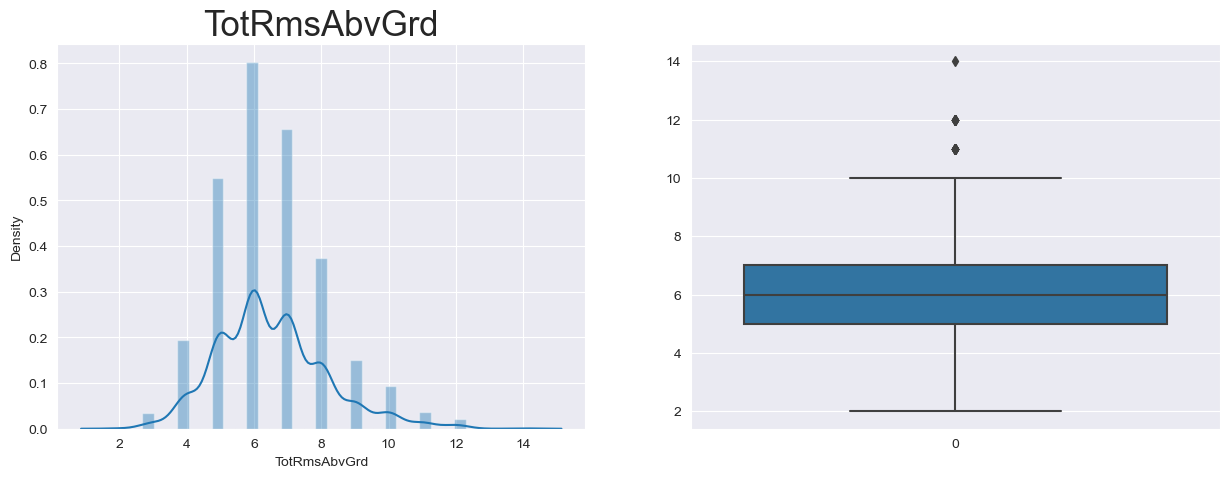

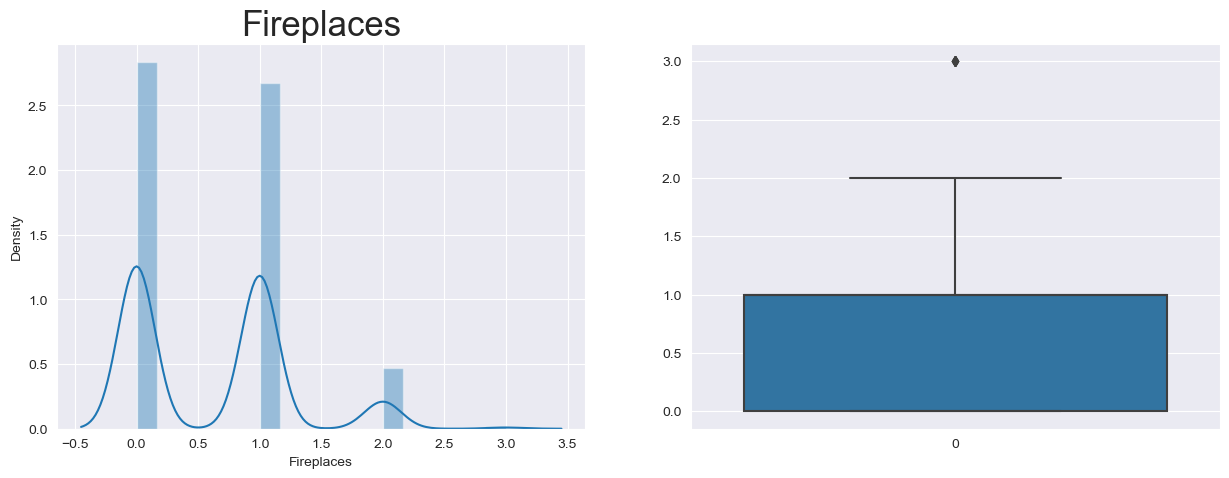

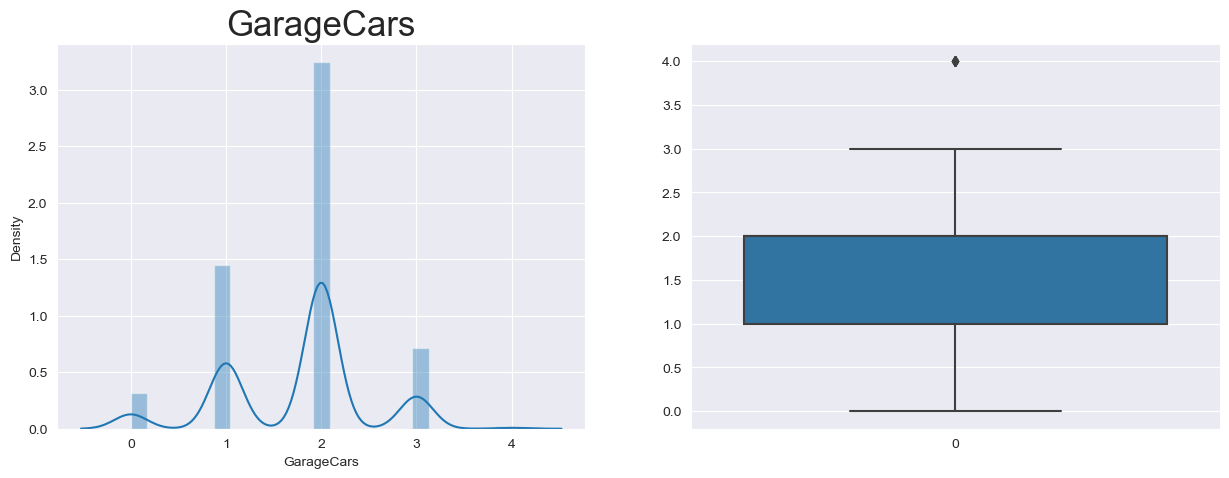

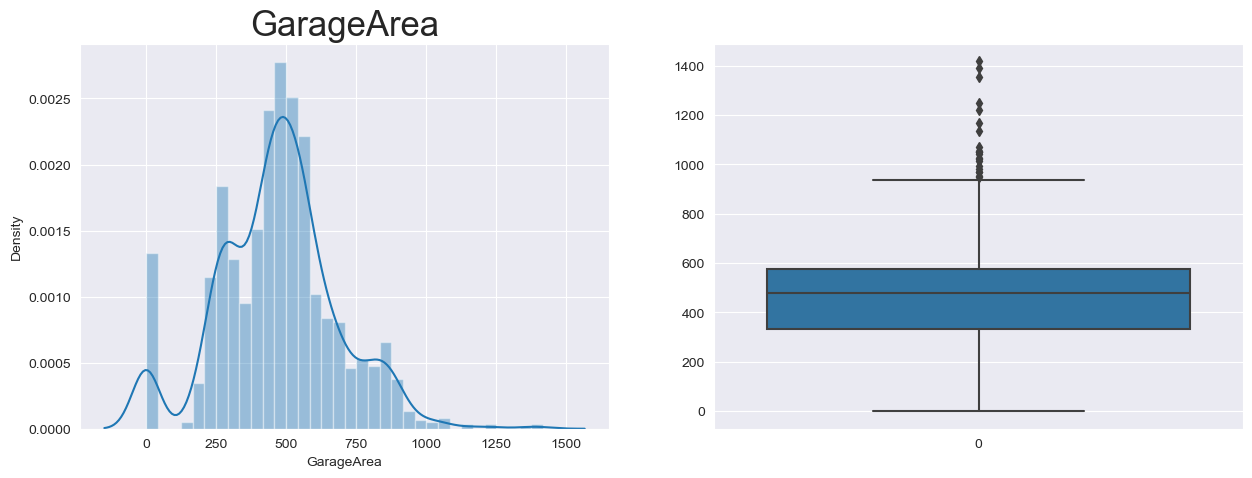

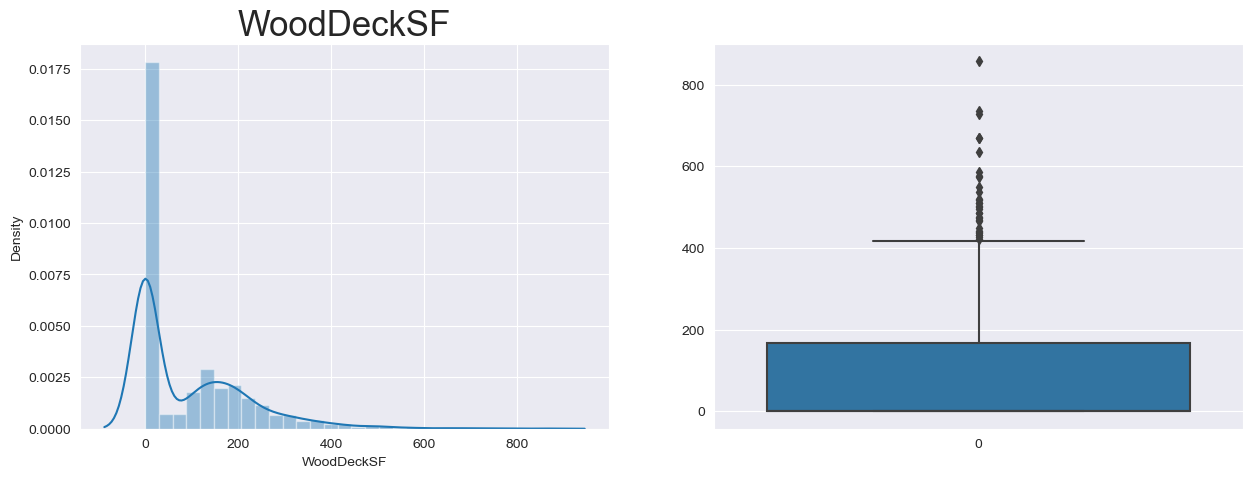

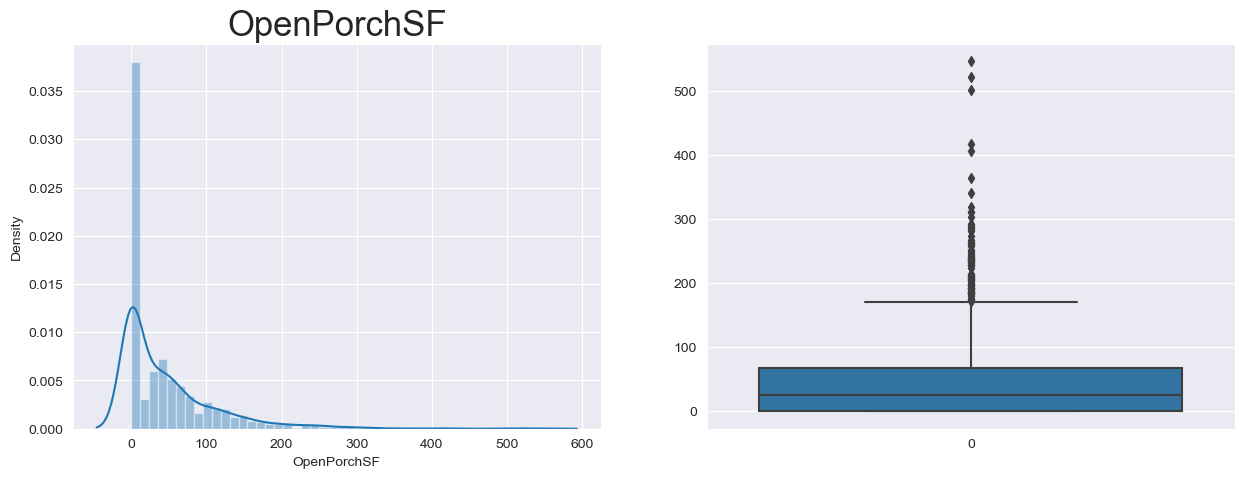

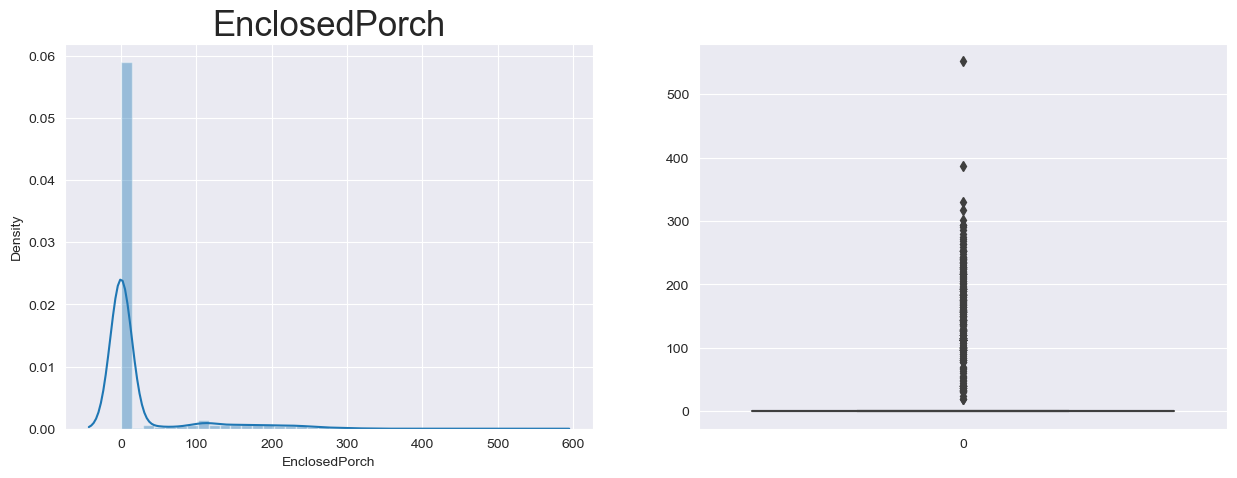

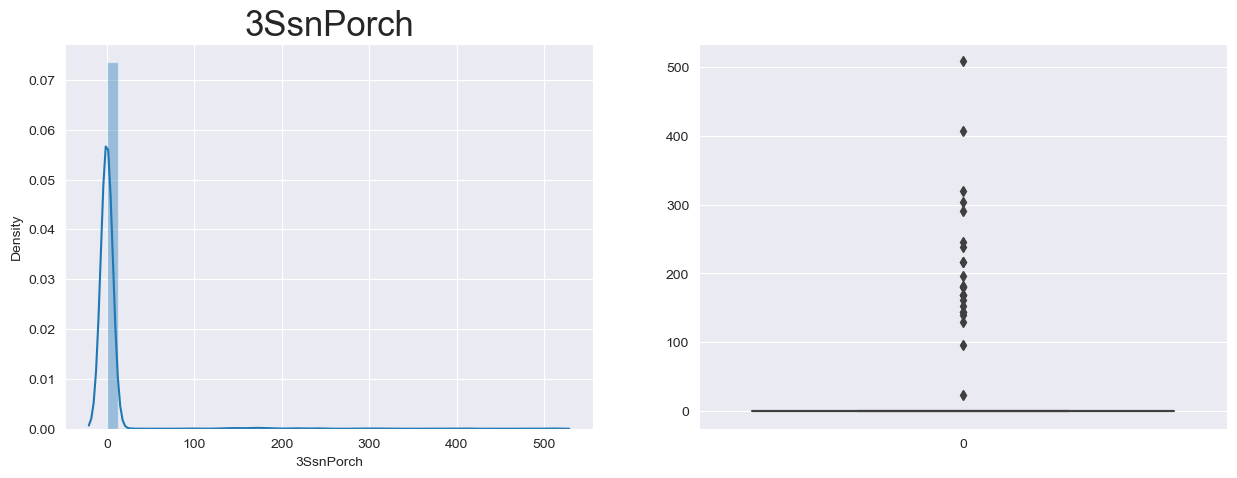

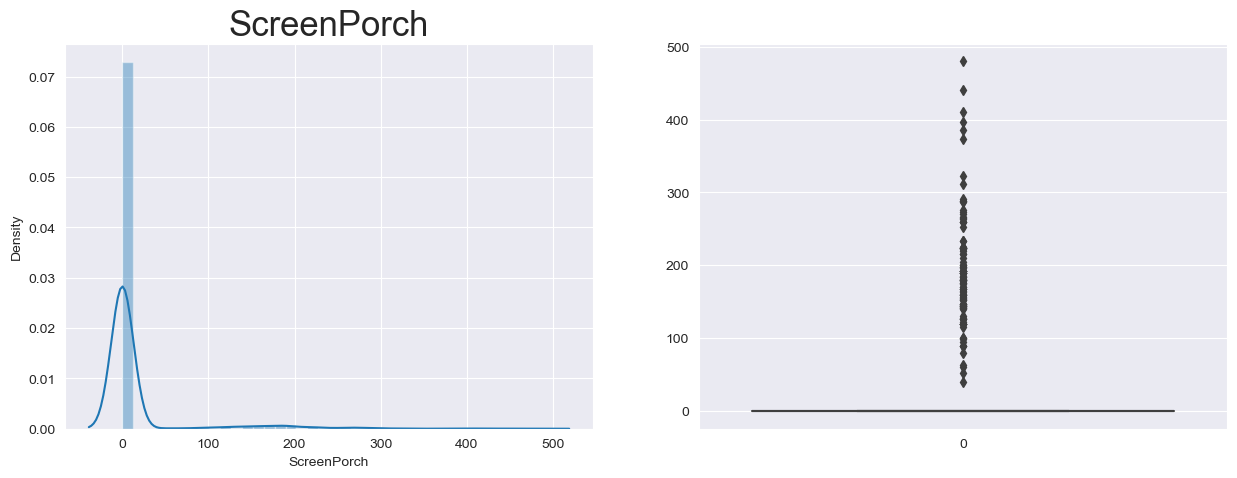

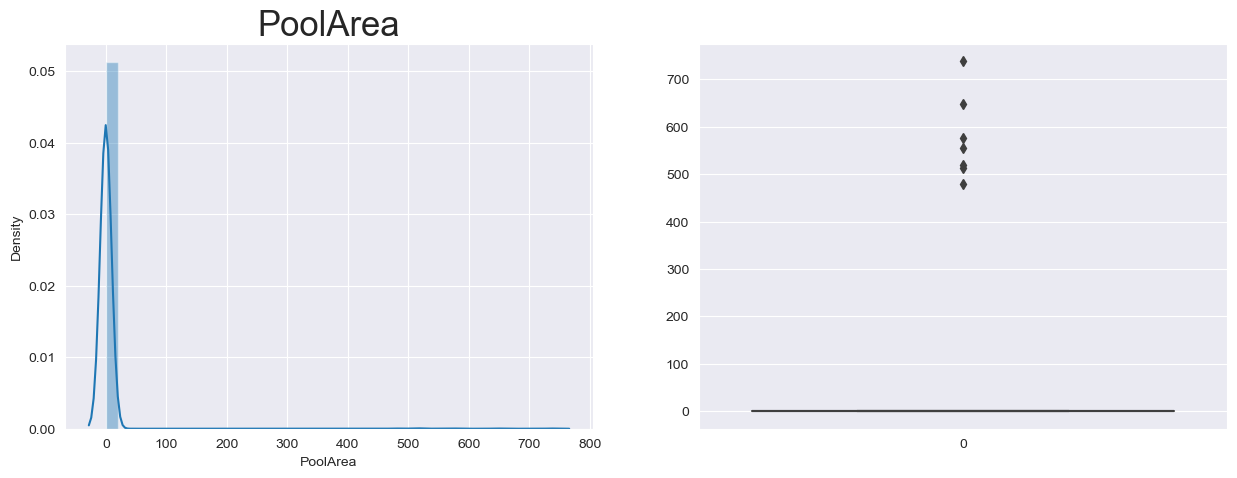

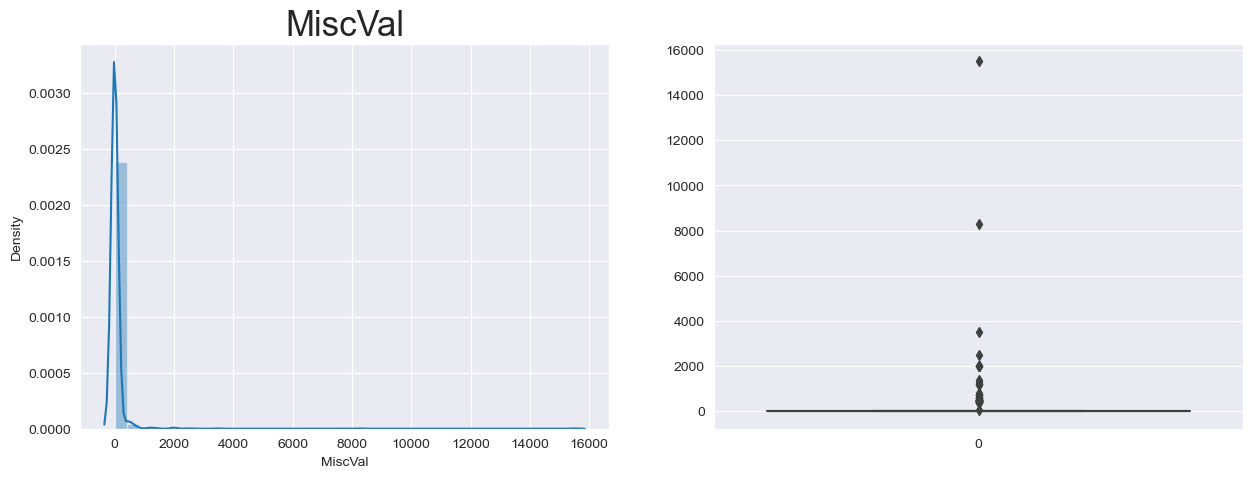

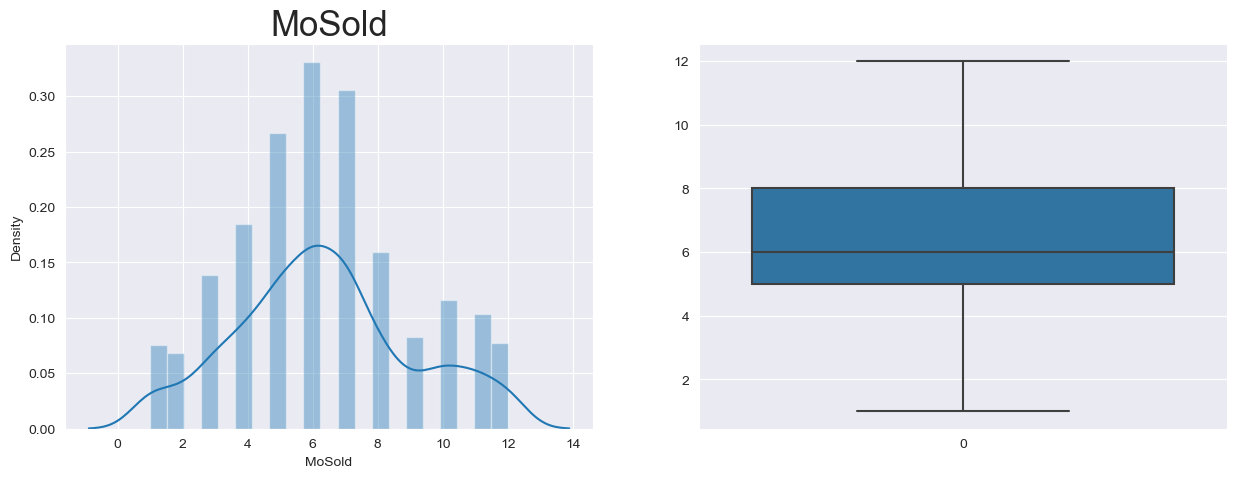

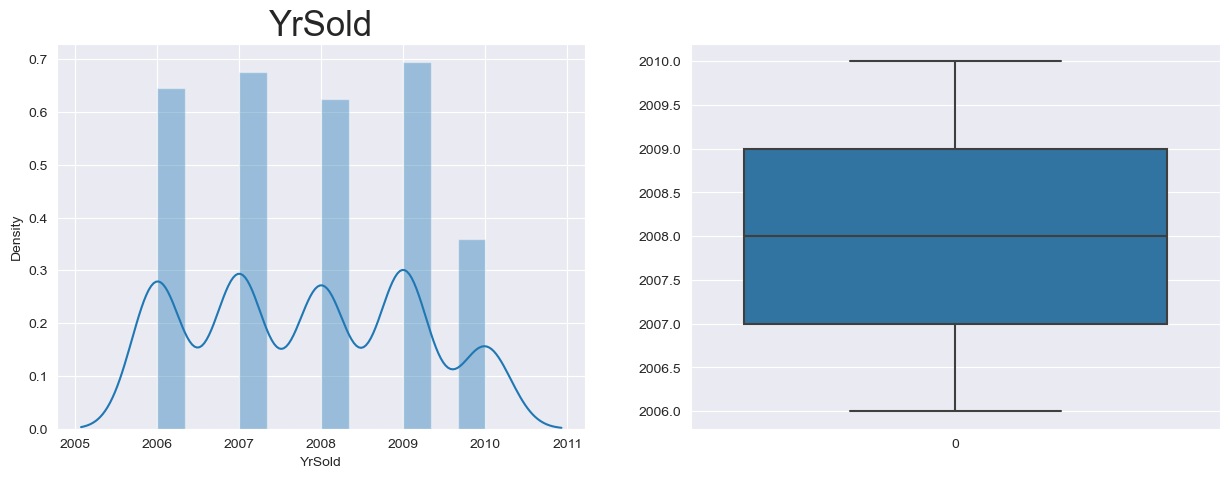

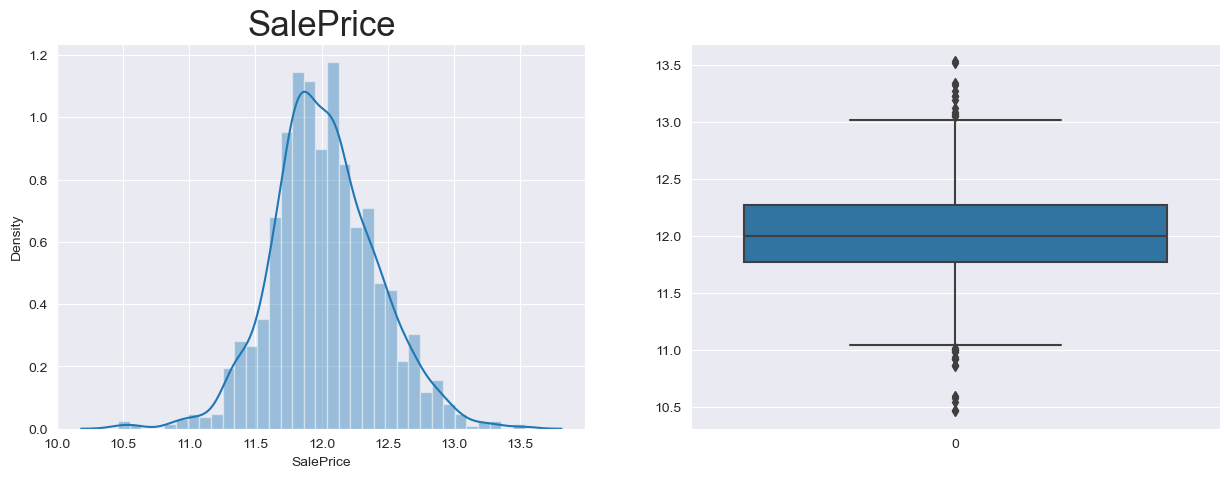

In [23]:
for col in df_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 25})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()    

In [27]:
#there is a lot of outliers so we will need to remove them
for col in df_cat.columns:
    print(col)
    print(df[col].unique(), '\n')

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['None' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[7 6 8 5 9 4 10 3 1 2] 

OverallCond
[5 8 6 7 4 2 3 9 1] 

RoofStyle
['Gab

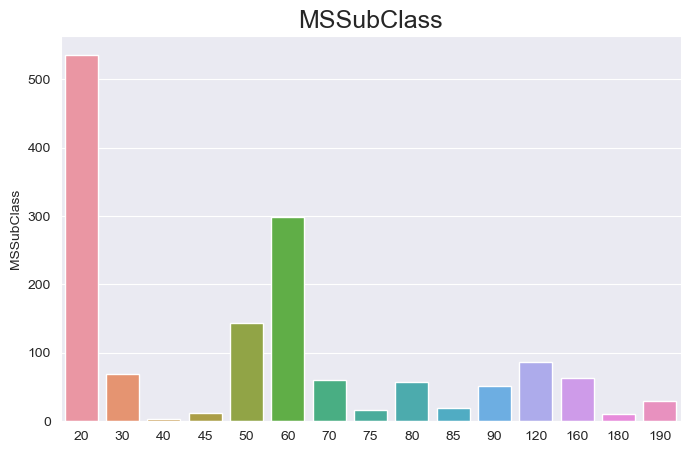

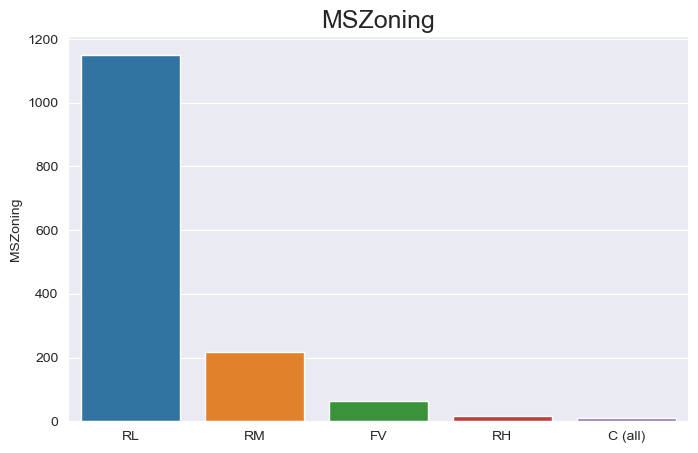

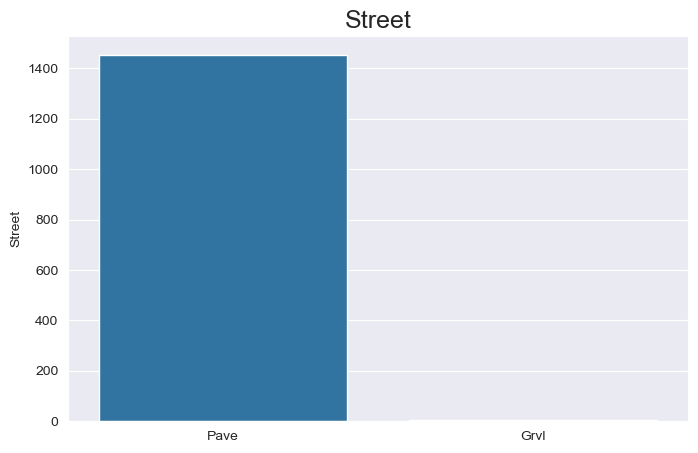

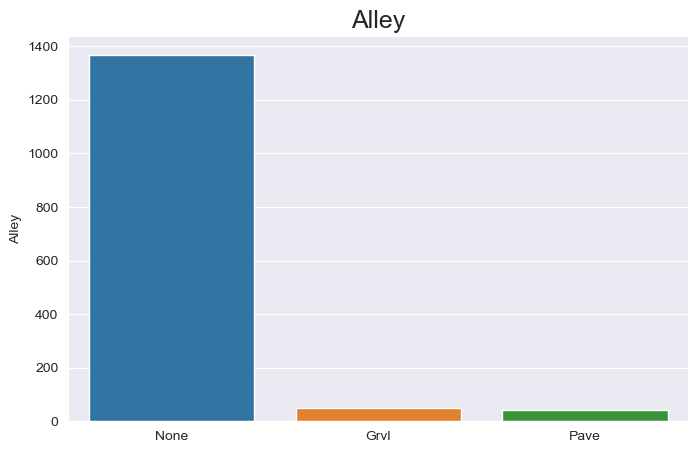

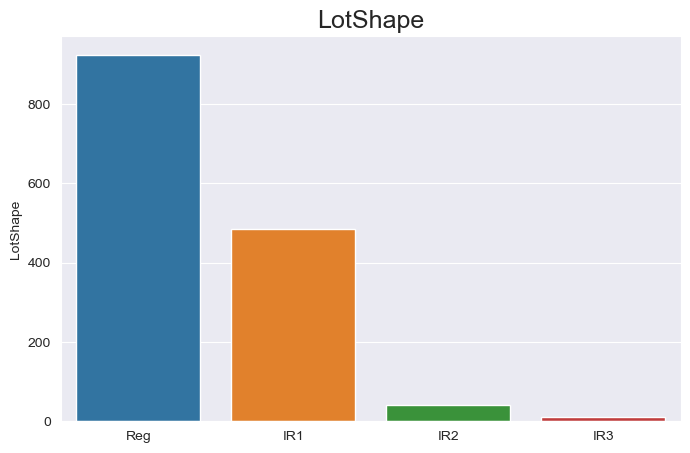

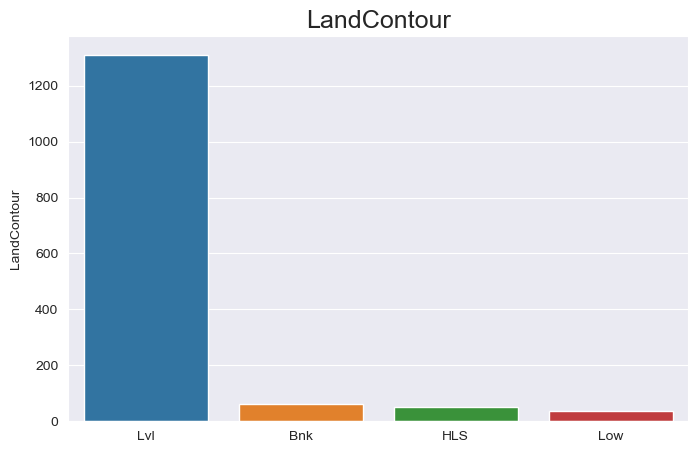

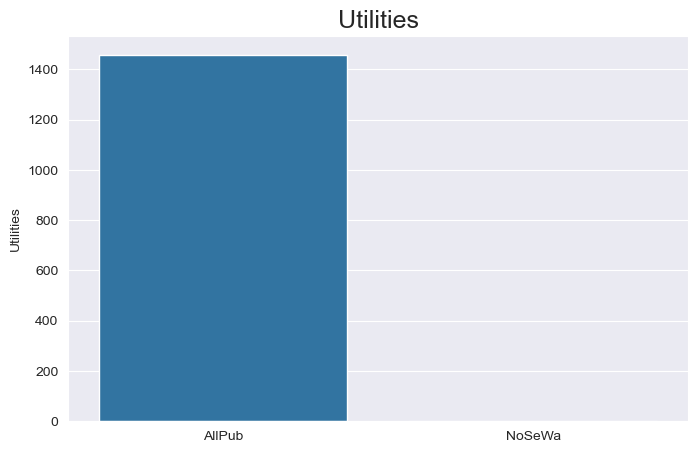

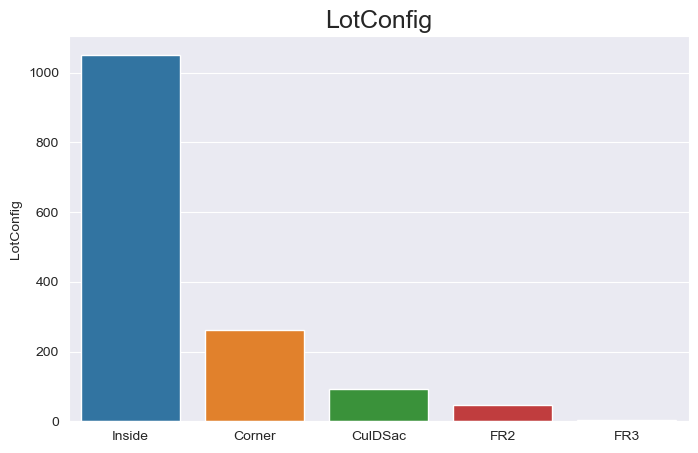

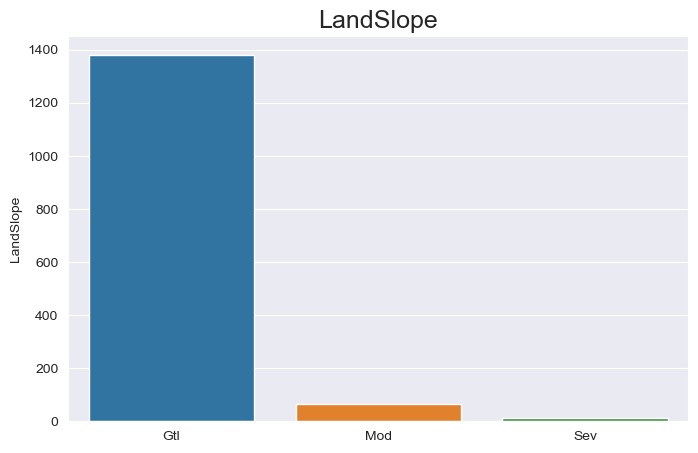

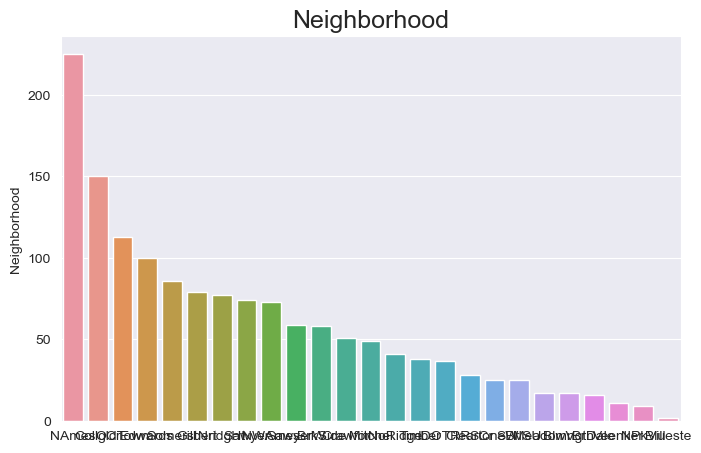

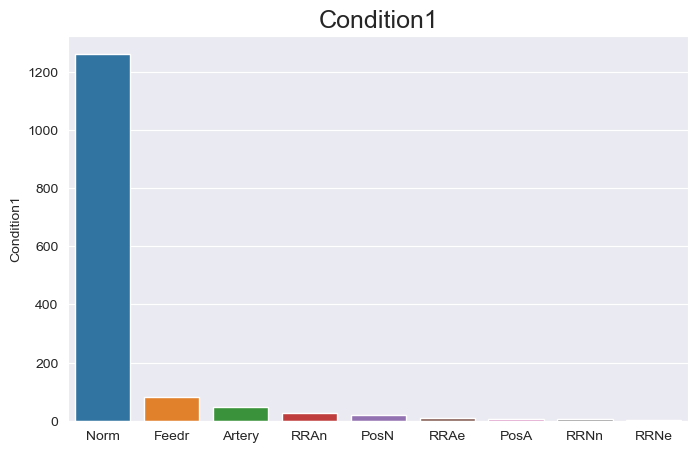

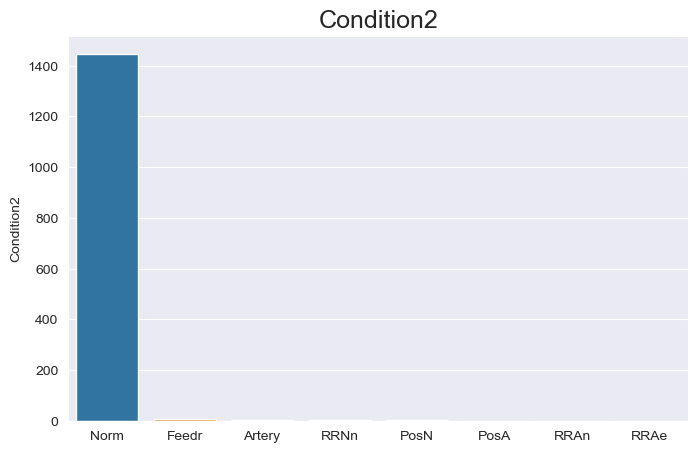

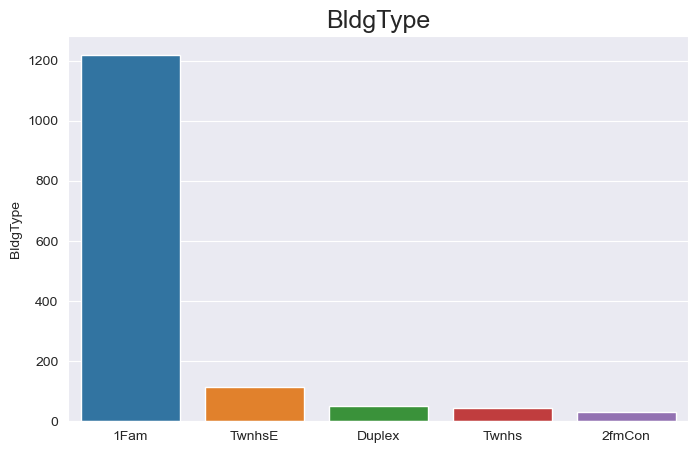

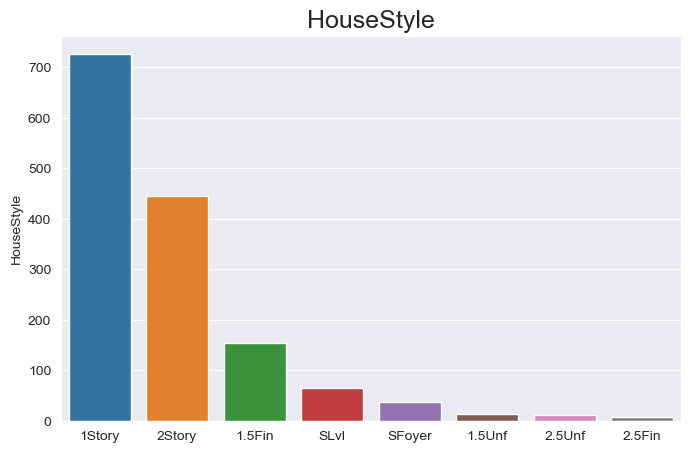

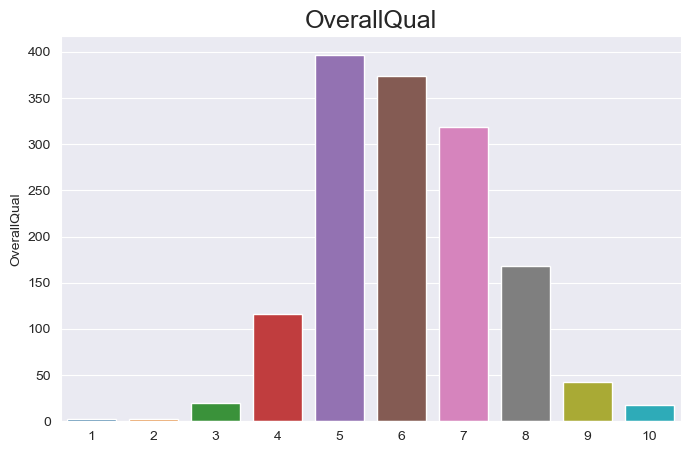

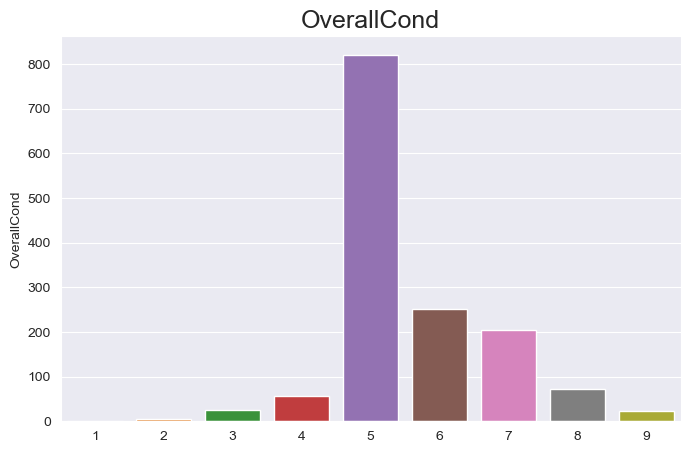

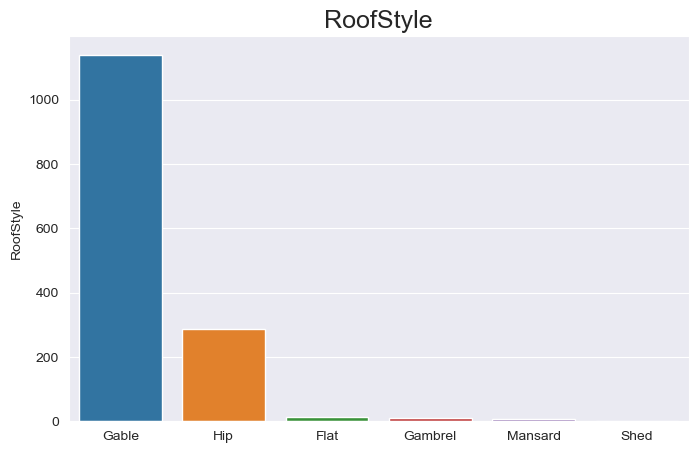

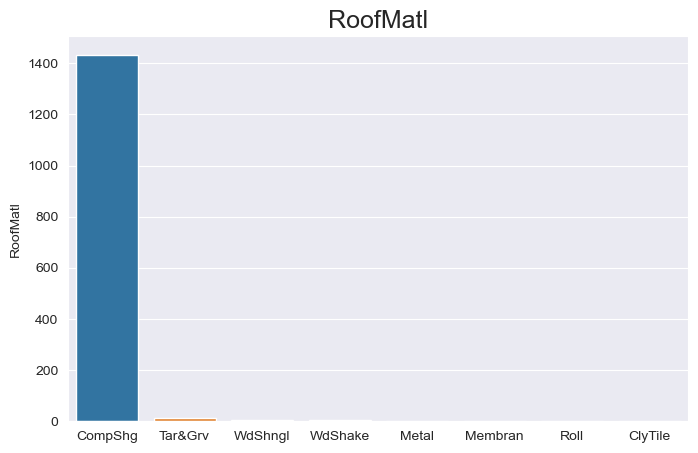

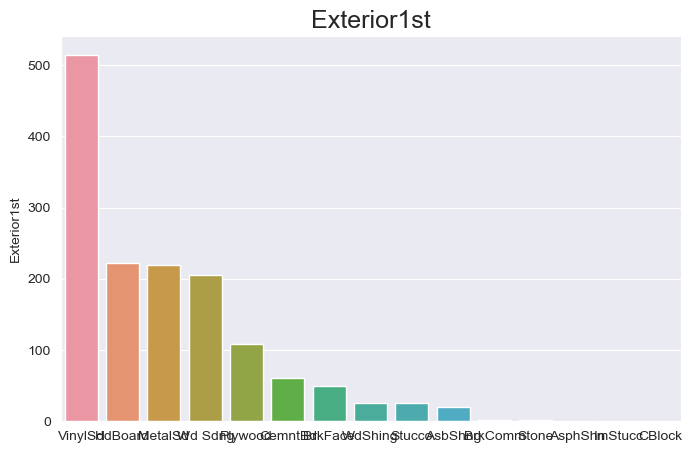

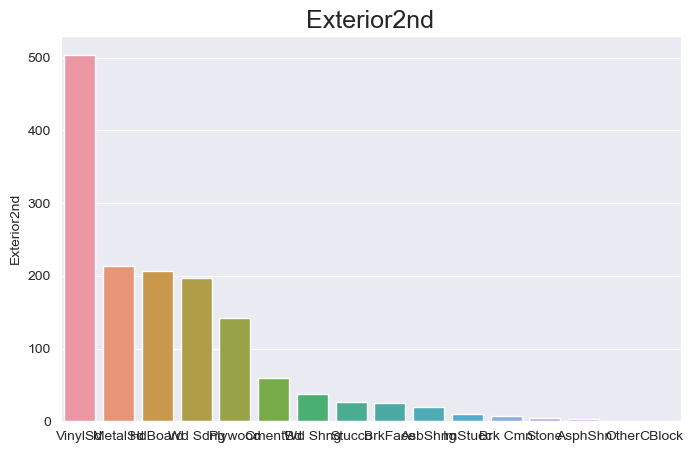

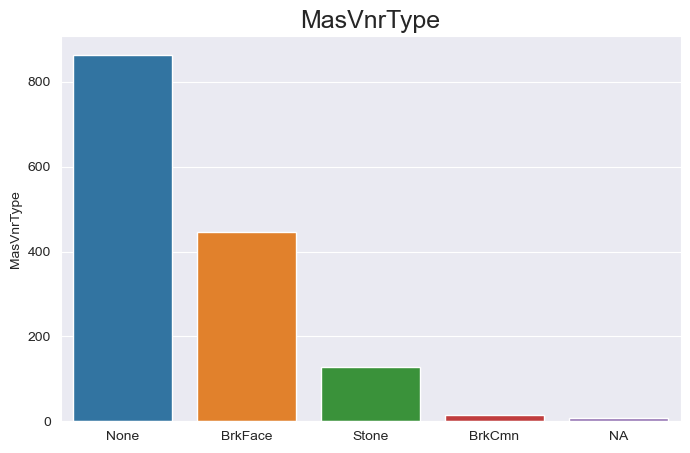

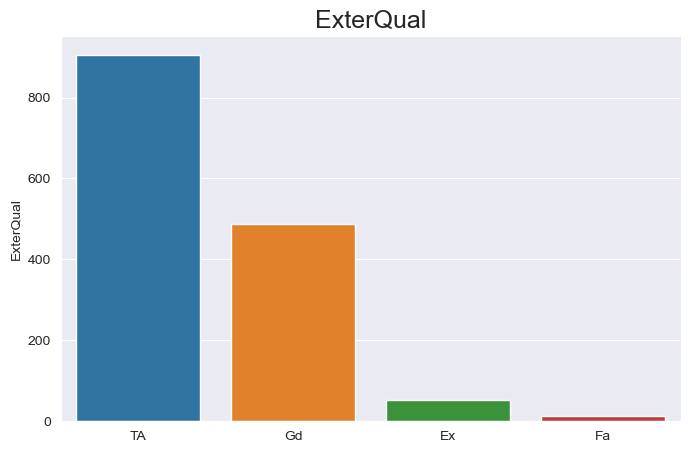

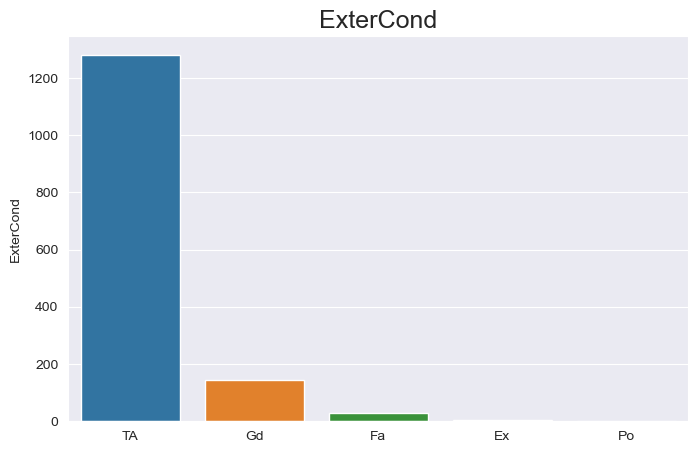

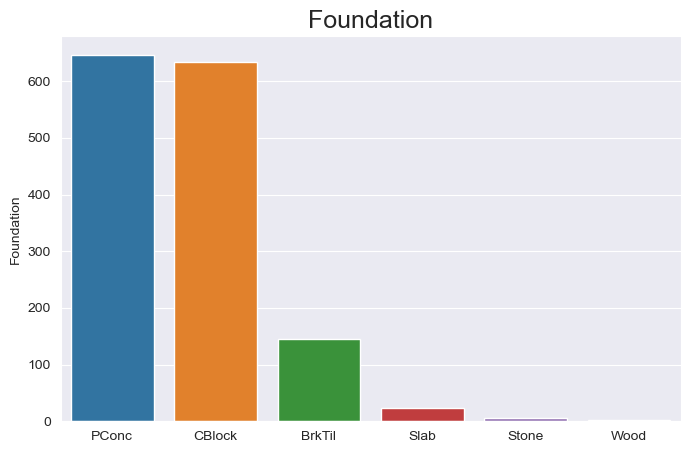

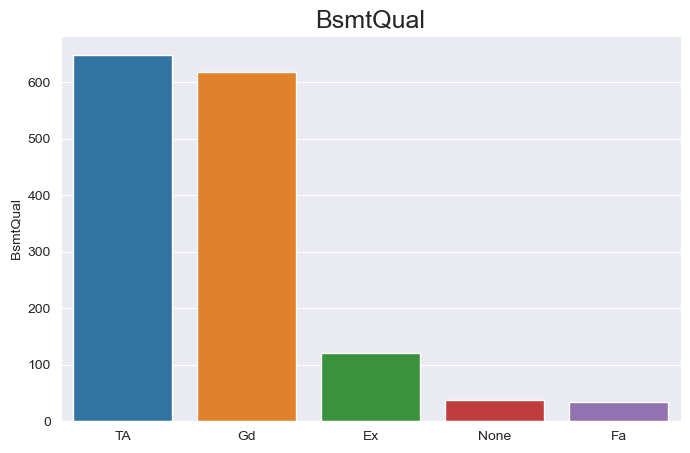

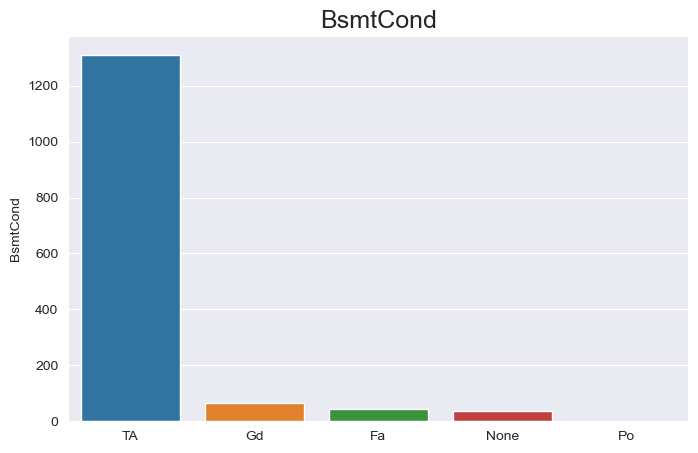

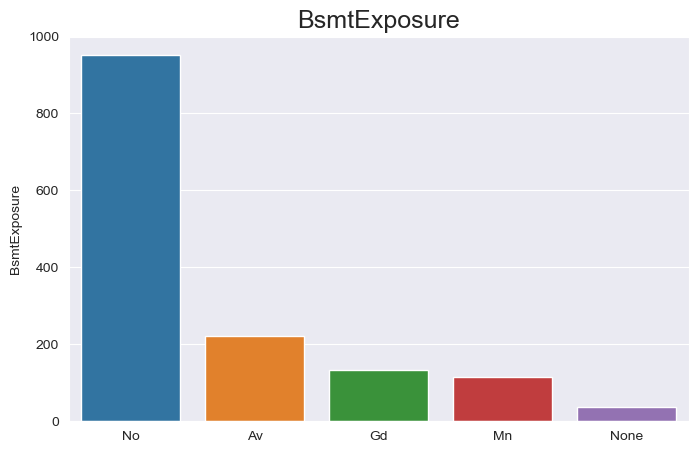

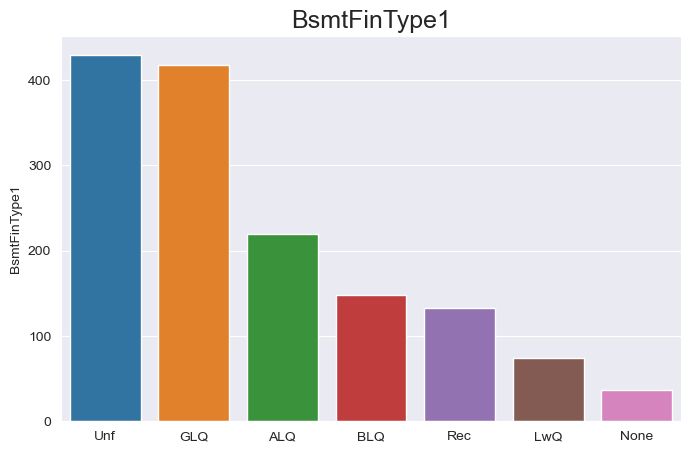

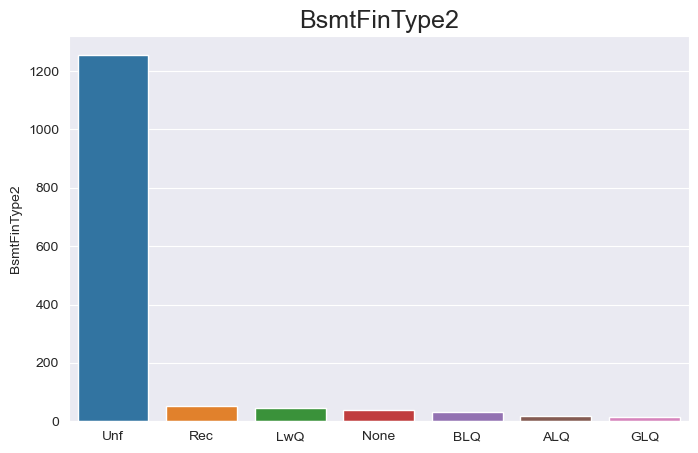

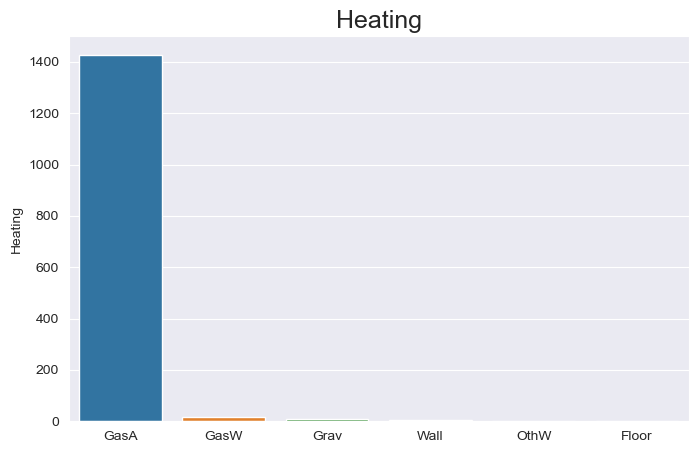

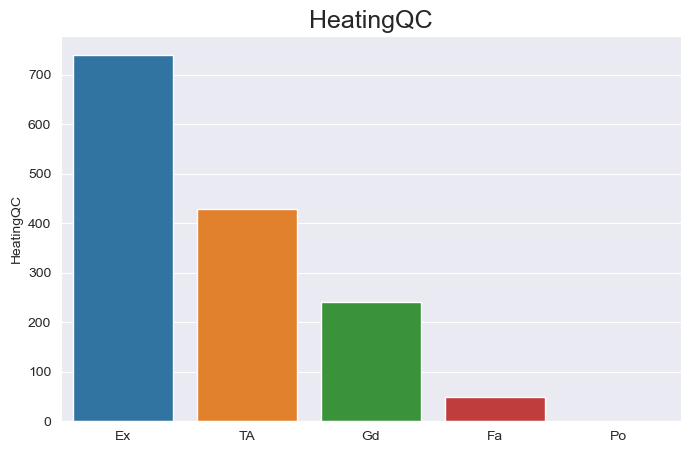

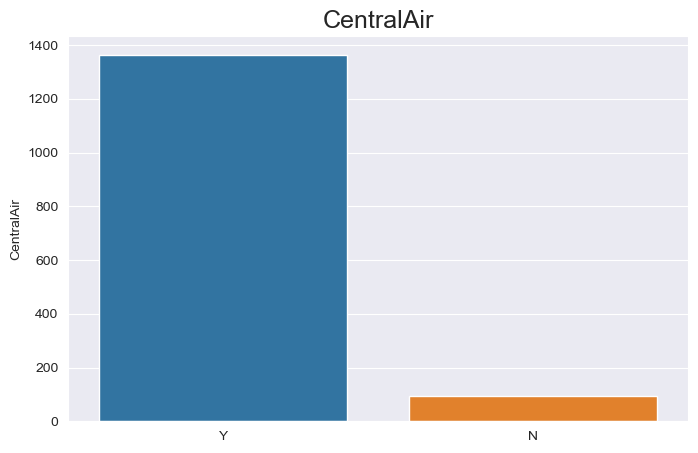

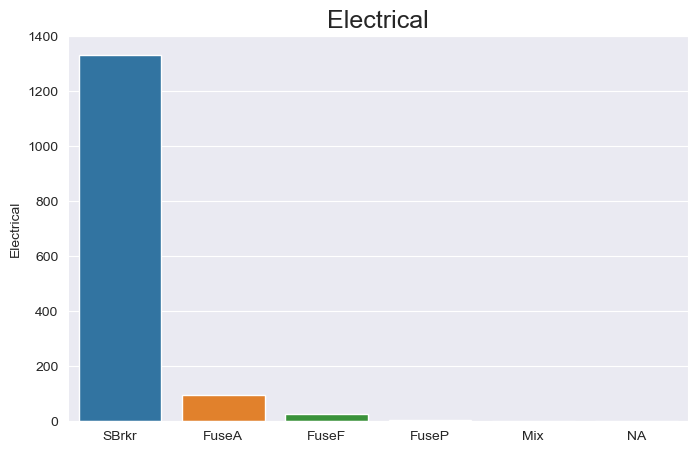

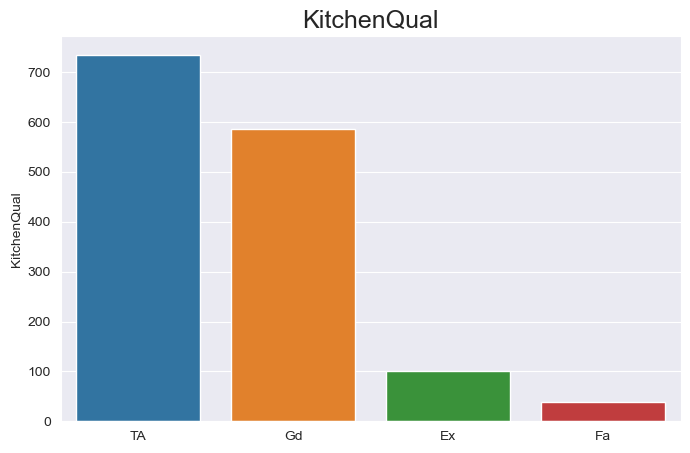

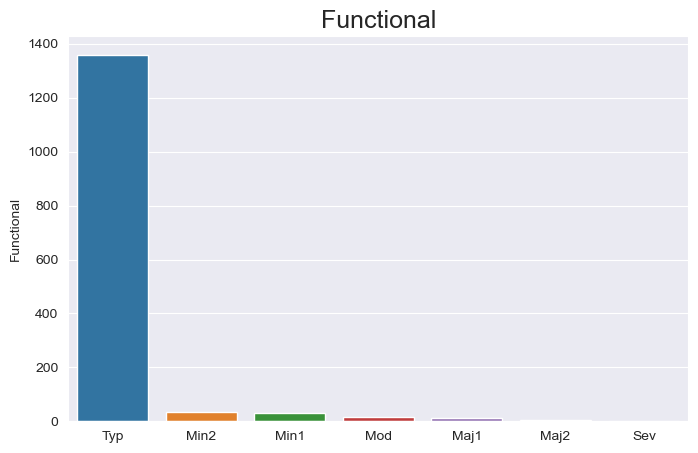

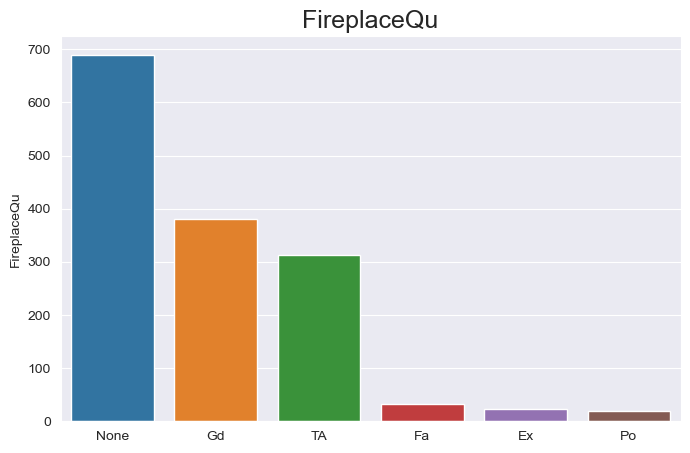

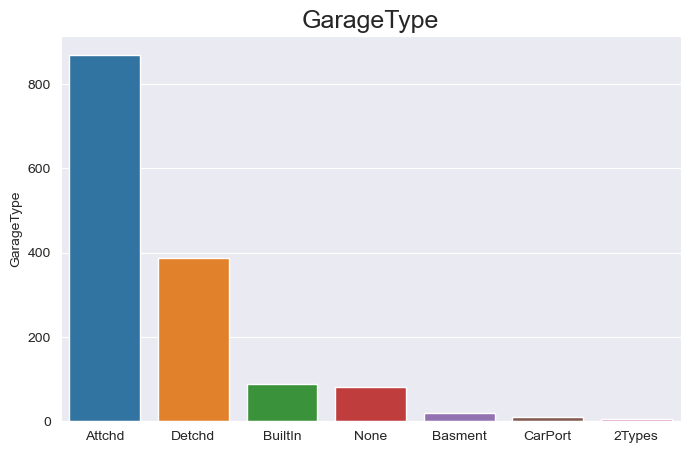

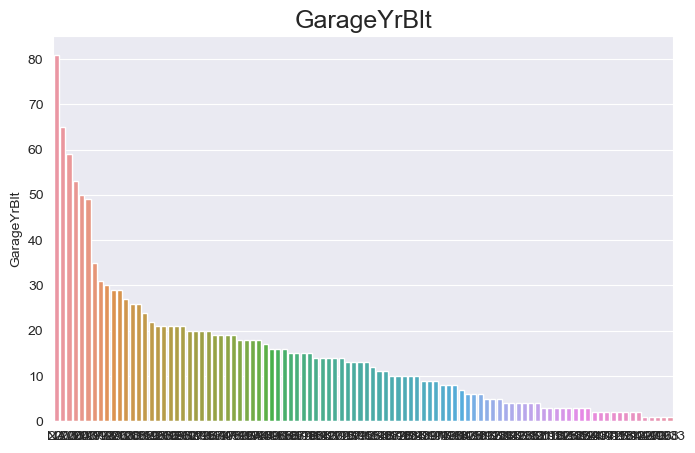

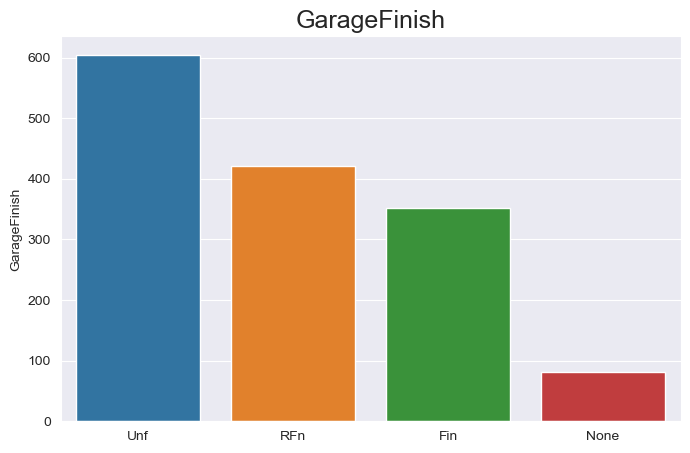

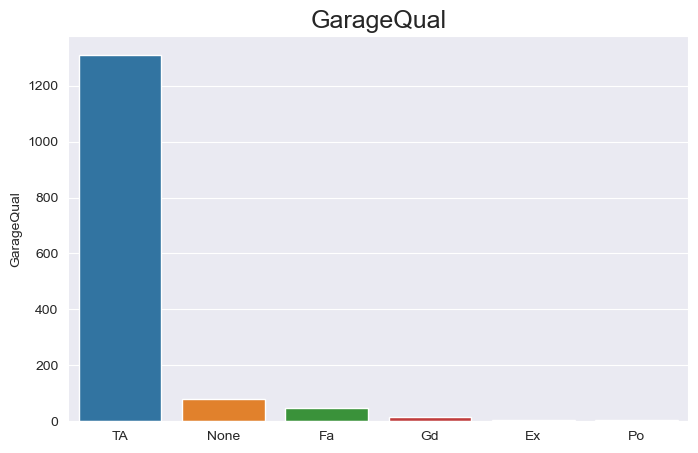

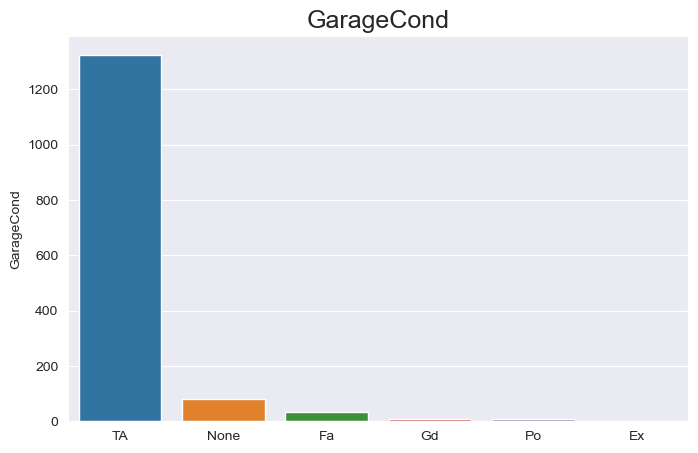

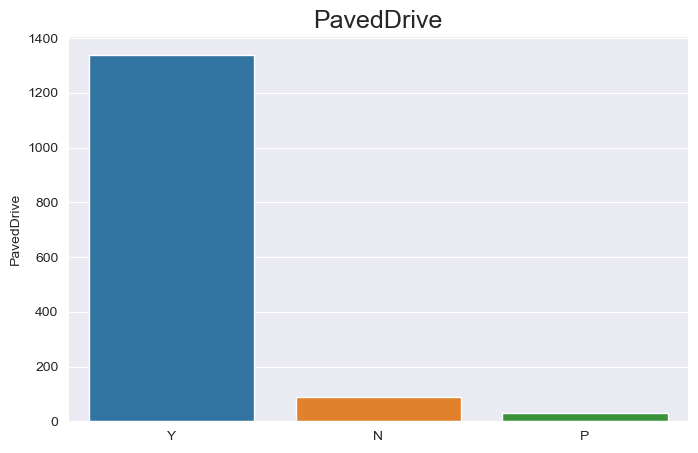

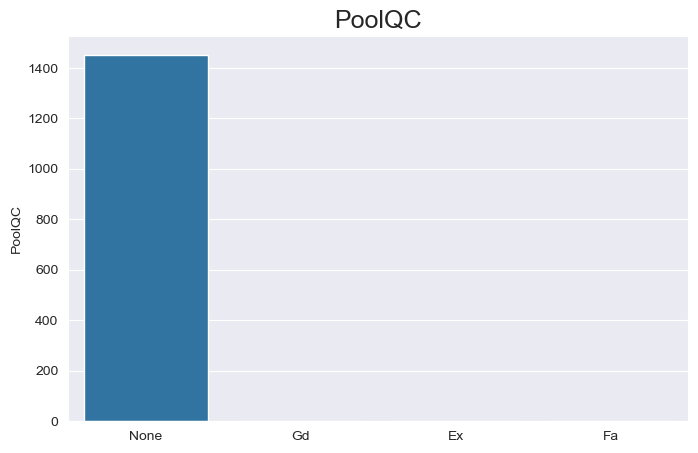

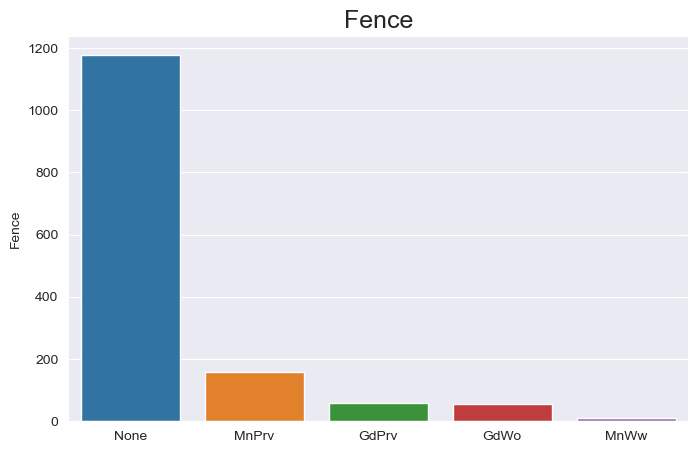

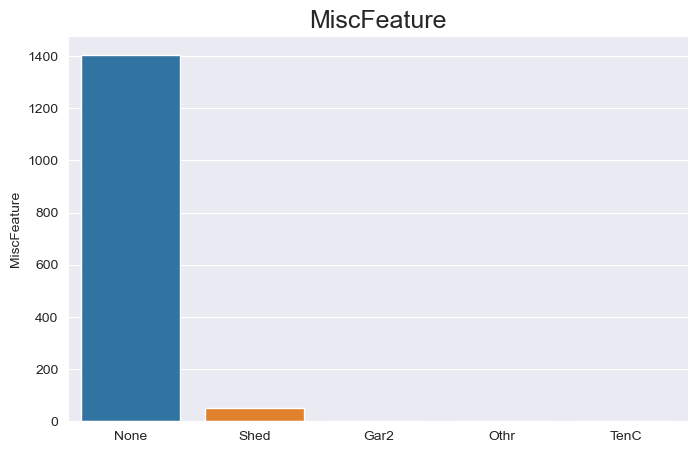

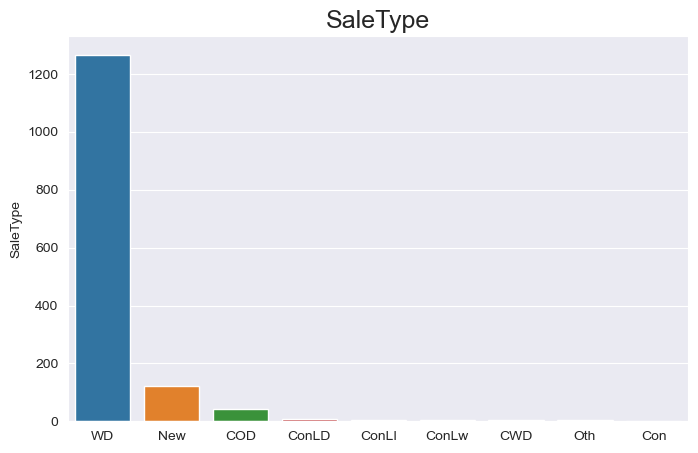

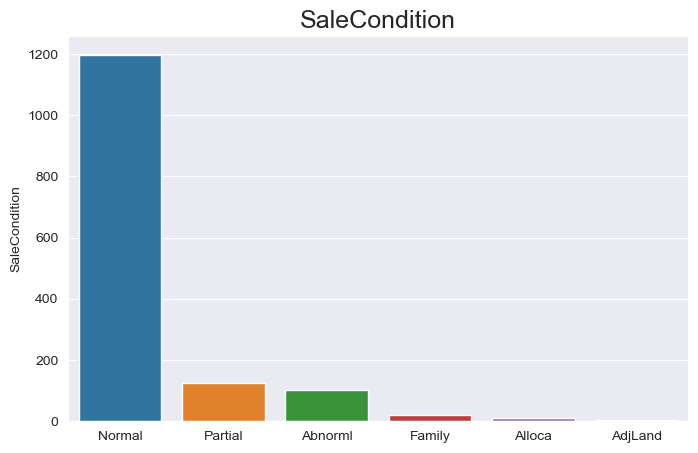

In [30]:
# now use bar plots to look at categorical columns
for col in df_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x=df_cat[col].value_counts().index, y=df_cat[col].value_counts())    
    plt.show()

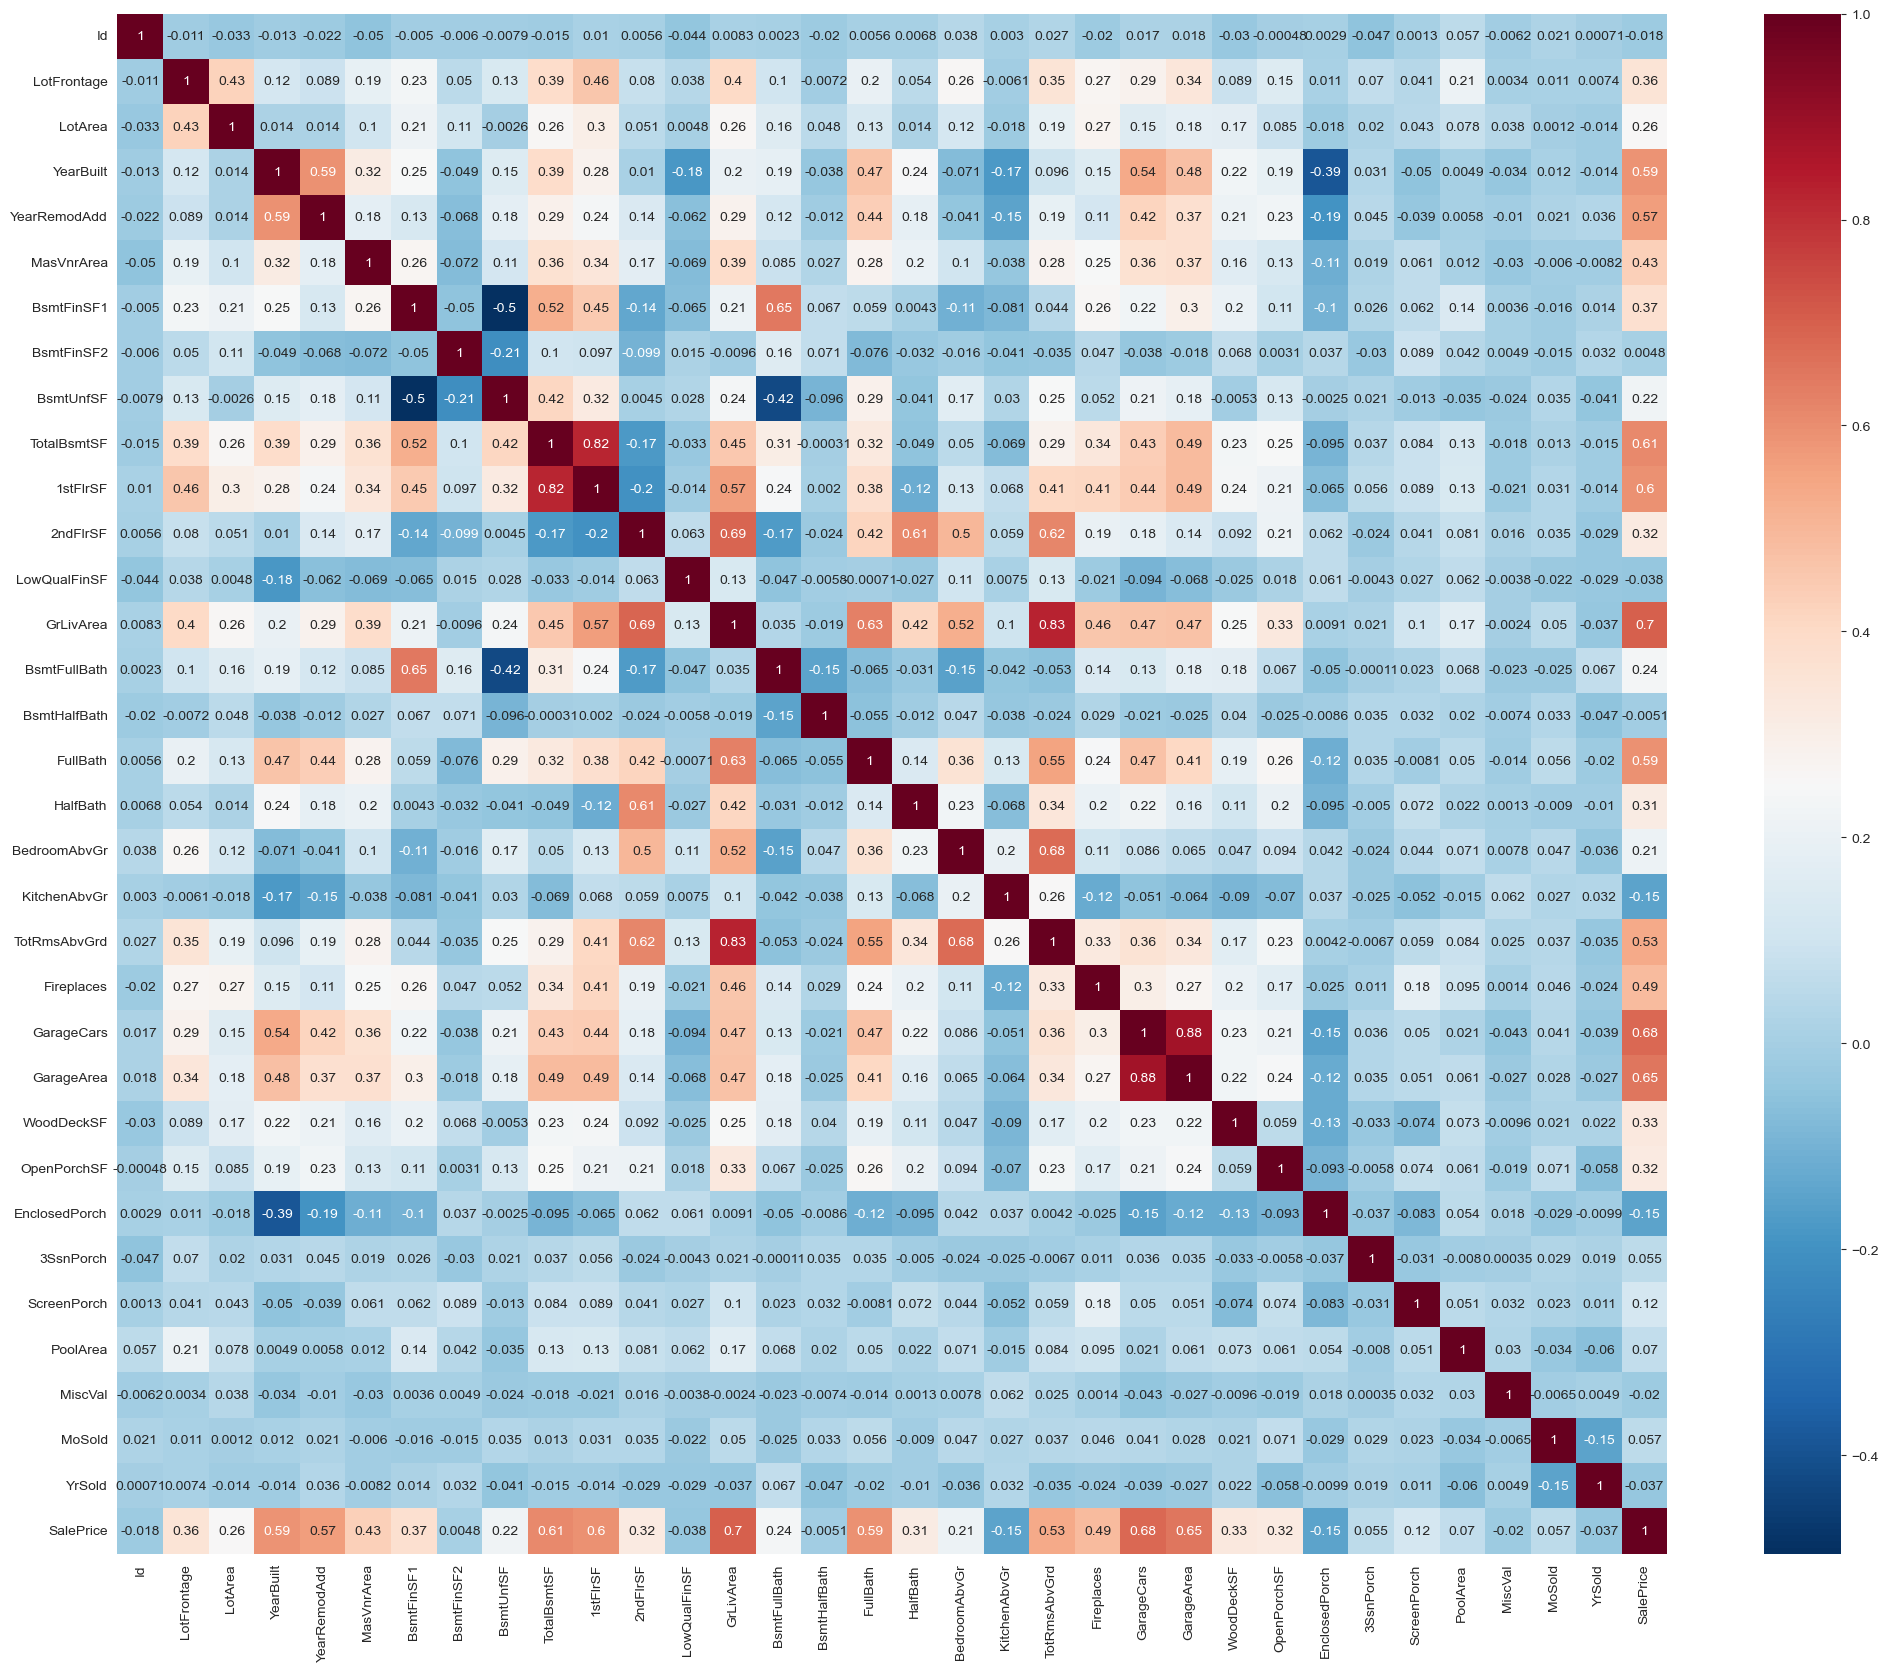

In [31]:
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdBu_r');

In [32]:
#there is a lot of multicollinearity 
#calculate age of house
df['Age'] = df['YrSold'] - df['YearBuilt']
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  None      Reg   
1   2         20       RL         80.0     9600   Pave  None      Reg   
2   3         60       RL         68.0    11250   Pave  None      IR1   
3   4         70       RL         60.0     9550   Pave  None      IR1   
4   5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story           7           5          2003   
1       Norm     1Fam     1Story           6           8          1976   
2       Norm     1Fam     2Story           7           5          2002   
3       Norm     1Fam     2Story           7           5          1970   
4       Norm     1Fam     2Story           8           5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           1          Gd   
4             1          Gd             9  

In [34]:
#now encode dummy variables for categorical variables
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

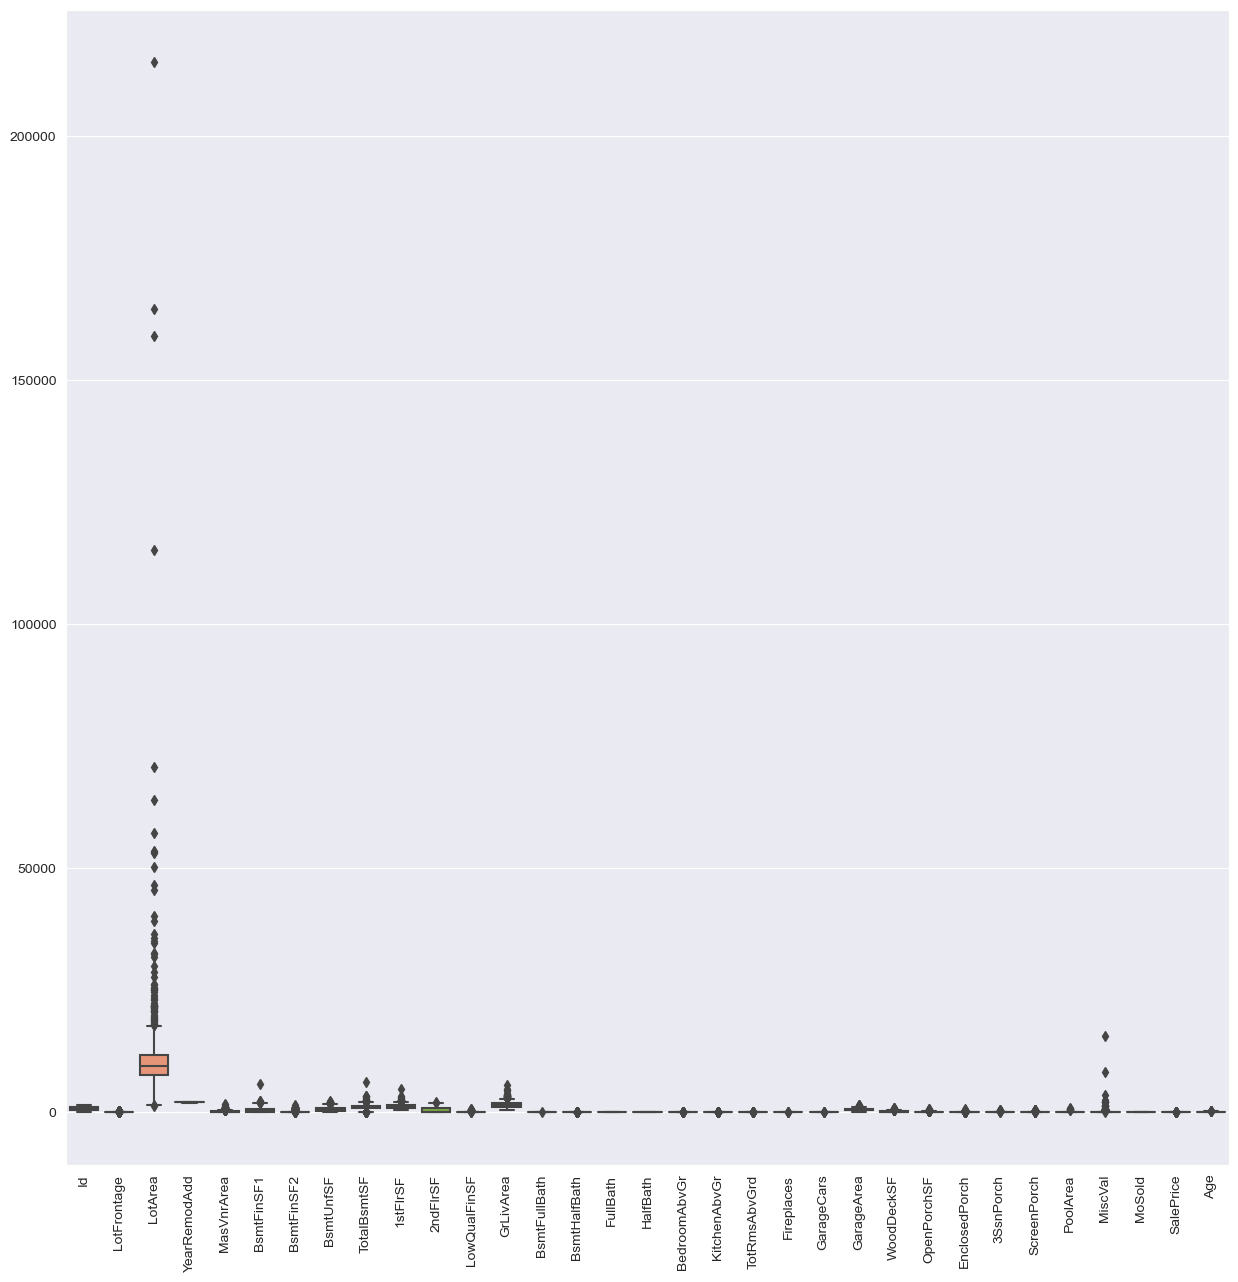

In [35]:
#check outliers
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);


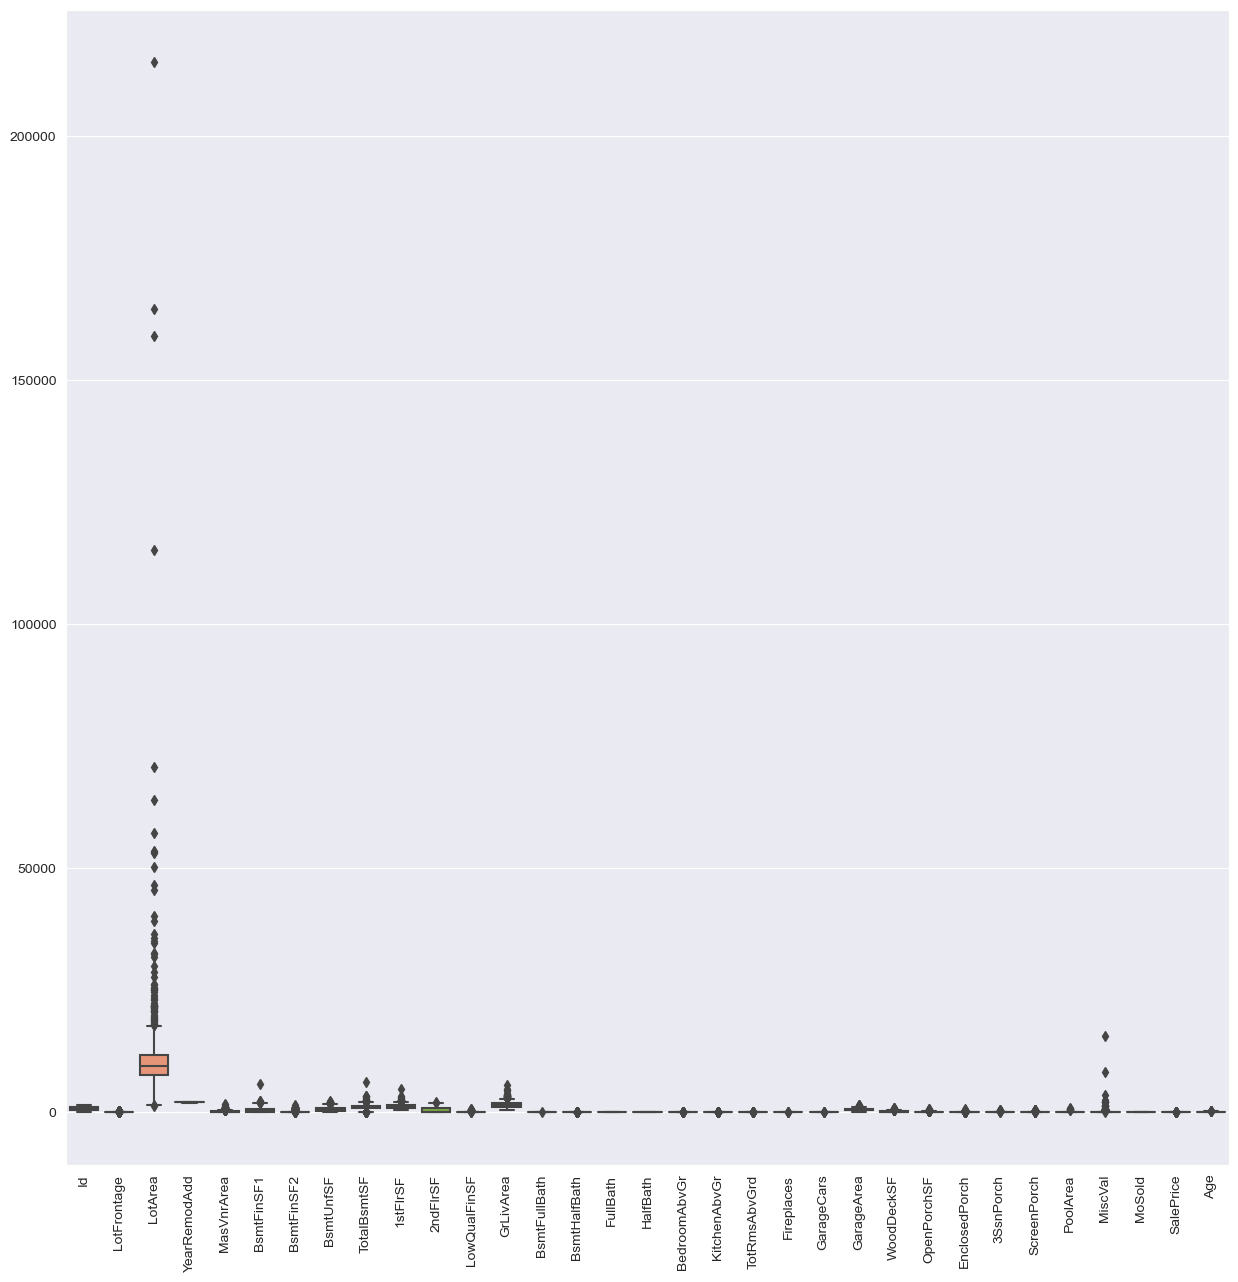

In [36]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [37]:
df = pd.concat([df_num, df_cat_encoded], axis=1)
df.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0   1         65.0     8450          2003       196.0         706           0   
1   2         80.0     9600          1976         0.0         978           0   
2   3         68.0    11250          2002       162.0         486           0   
3   4         60.0     9550          1970         0.0         216           0   
4   5         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150          856       856       854             0       1710   
1        284         1262      1262         0             0       1262   
2        434          920       920       866             0       1786   
3        540          756       961       756             0       1717   
4        490         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2         548           0           61   
1             6           1           2         460         298            0   
2             6           1           2         608           0           42   
3             7           1           3         642           0           35   
4             9           1           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0              0          0            0         0        0       2   
1              0          0            0         0        0       5   
2              0          0            0         0        0       9   
3            272          0            0         0        0       2   
4              0          0            0         0        0      12   

   SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0  12.247694    5              0              0              0              0   
1  12.109011   31              0              0              0              0   
2  12.317167    7              0              0              0              0   
3  11.849398   91              0              0              0              0   
4  12.429216    8              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0            0            0            1            0   
1               0            0            0            1            0   
2               0            0            0            1            0   
3      

In [38]:
#now let's drop ID as it is not a helpful independent variable
X = df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450          2003       196.0         706           0   
1         80.0     9600          1976         0.0         978           0   
2         68.0    11250          2002       162.0         486           0   
3         60.0     9550          1970         0.0         216           0   
4         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150          856       856       854             0       1710   
1        284         1262      1262         0             0       1262   
2        434          920       920       866             0       1786   
3        540          756       961       756             0       1717   
4        490         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2         548           0           61   
1             6           1           2         460         298            0   
2             6           1           2         608           0           42   
3             7           1           3         642           0           35   
4             9           1           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  Age  \
0              0          0            0         0        0       2    5   
1              0          0            0         0        0       5   31   
2              0          0            0         0        0       9    7   
3            272          0            0         0        0       2   91   
4              0          0            0         0        0      12    8   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            

In [39]:
y = df["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [40]:
#train the data by splitting into 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [43]:
#scale numerical columns
num_sca = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
scaler = StandardScaler()
X_train[num_sca] = scaler.fit_transform(X_train[num_sca])
X_test[num_sca] = scaler.transform(X_test[num_sca])


In [45]:
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    metric = []
    #how to get R^2 of train and test data
    print("R^2 (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R^2 (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## how to get RSS  on train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## MSE train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    #RMSE for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [49]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

ridgeCross = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCross.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
ridgeCross.best_params_

{'alpha': 10.0}

In [63]:
ridgeCross.cv_results_

{'mean_fit_time': array([0.03389101, 0.03925843, 0.03688283, 0.0369874 , 0.03611474,
        0.03523731, 0.042729  , 0.03769884, 0.04210591, 0.0418673 ,
        0.04688215, 0.04319539, 0.04369149, 0.04372325, 0.04562788,
        0.042558  , 0.04049582, 0.04379144, 0.04695907, 0.04552994,
        0.0488112 , 0.04495273, 0.05169139, 0.04782114, 0.04123445,
        0.04347348, 0.04409332, 0.04301414]),
 'std_fit_time': array([1.85352467e-03, 5.89009476e-03, 5.93990804e-03, 3.93170403e-03,
        5.49407461e-05, 2.99440649e-03, 5.46455914e-03, 8.88248740e-03,
        5.21593106e-03, 3.70554904e-03, 8.92235558e-03, 6.31476845e-03,
        1.18686054e-02, 2.75518275e-03, 4.38486305e-03, 3.45800148e-03,
        2.49776172e-03, 4.72030262e-03, 9.06185359e-03, 1.89734255e-03,
        7.75409793e-03, 6.84474987e-03, 2.80970923e-03, 9.20348455e-03,
        2.84991301e-03, 3.78755854e-03, 4.30931899e-03, 3.15839169e-03]),
 'mean_score_time': array([0.00801458, 0.0088079 , 0.00961938, 0.00801911, 

In [64]:
#put ridge regression with alpha value of 10
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [65]:
ridge.coef_

array([-1.13723428e-02,  1.70002299e-02,  2.67450572e-02,  2.32137065e-03,
       -3.23746148e-03,  7.35014180e-03,  1.57200810e-03,  8.58646391e-04,
        3.44766657e-02,  4.50633994e-02,  5.45166293e-03,  6.36895773e-02,
        2.37594647e-02,  1.29785519e-03,  2.30042981e-02,  1.63813271e-02,
        8.31302280e-03, -1.82680345e-02,  1.99730644e-02,  1.77079991e-02,
        4.24186252e-02,  5.64454200e-03,  1.47569384e-02,  2.15432811e-03,
        7.42126669e-03,  8.31119741e-03,  1.57702397e-02, -5.96889498e-03,
        1.88623926e-04,  9.10677633e-04, -4.84008728e-02, -8.52571162e-02,
        1.02546499e-02, -6.84906454e-04,  3.48429299e-03, -2.71662561e-02,
        3.88761267e-02,  2.90938290e-02,  5.73393634e-03,  5.54442699e-03,
       -3.26998501e-03, -1.91930108e-02, -7.69442100e-02, -2.40112194e-02,
        2.05346097e-03,  3.76183865e-02,  2.09033632e-02,  3.23641367e-02,
       -1.43240231e-02,  6.30794531e-03, -9.48957694e-03,  1.83405632e-02,
        3.09388439e-02, -

In [66]:
#train y data with ridge regression
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R^2 (Train) = 0.92
R^2 (Test) = 0.89
RSS (Train) = 13.60
RSS (Test) = 5.92
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.11
RMSE (Test) = 0.14


In [67]:
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.074256      0.001617         0.004610        0.001962      0.0001   
1        0.081487      0.010622         0.005612        0.003252       0.001   
2        0.071792      0.006547         0.004670        0.003324        0.01   
3        0.040273      0.017461         0.007991        0.001058        0.05   
4        0.031934      0.003961         0.006253        0.000442         0.1   
5        0.037880      0.004701         0.007266        0.001900         0.2   
6        0.032633      0.002028         0.007322        0.001807         0.3   
7        0.030155      0.002499         0.006291        0.001589         0.4   
8        0.032323      0.000995         0.006391        0.001509         0.5   
9        0.028807      0.001488         0.007784        0.000420         0.6   
10       0.030371      0.002945         0.006601        0.001231         0.7   
11       0.030879      0.002445         0.005053        0.000980         0.8   
12       0.032201      0.002357         0.006619        0.001933         0.9   
13       0.032888      0.004104         0.007041        0.002323         1.0   
14       0.032343      0.001505         0.005764        0.001537         2.0   
15       0.031603      0.002520         0.006321        0.003772         3.0   
16       0.032441      0.001620         0.006175        0.001104         4.0   
17       0.030572      0.003154         0.006554        0.001886         5.0   
18       0.027292      0.003586         0.005942        0.003372         6.0   
19       0.028548      0.004403         0.007832        0.002056         7.0   
20       0.030477      0.003271         0.006274        0.001799         8.0   
21       0.025776      0.001623         0.006007        0.001253         9.0   
22       0.028727      0.002663         0.005621        0.001835        10.0   
23       0.027356      0.003211         0.006290        0.000953          20   
24       0.025236      0.002886         0.006071        0.001913          50   
25       0.026716      0.001576         0.005773        0.001356         100   
26       0.026769      0.003402         0.007007        0.002293         500   
27       0.025288      0.003355         0.003310        0.002074        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.107517          -0.122466   
1    {'alpha': 0.001}          -0.106659          -0.117371   
2     {'alpha': 0.01}          -0.104695          -0.112798   
3     {'alpha': 0.05}          -0.103058          -0.109826   
4      {'alpha': 0.1}          -0.103468          -0.108032   
5      {'alpha': 0.2}          -0.104317          -0.105474   
6      {'alpha': 0.3}          -0.104732          -0.103723   
7      {'alpha': 0.4}          -0.104753          -0.102445   
8      {'alpha': 0.5}          -0.104599          -0.101423   
9      {'alpha': 0.6}          -0.104554          -0.100583   
10     {'alpha': 0.7}          -0.104478          -0.099879   
11     {'alpha': 0.8}          -0.104352          -0.099279   
12     {'alpha': 0.9}          -0.104190          -0.098753   
13     {'alpha': 1.0}          -0.104040          -0.098280   
14     {'alpha': 2.0}          -0.102196          -0.094980   
15     {'alpha': 3.0}          -0.100434          -0.092997   
16     {'alpha': 4.0}          -0.098920          -0.091630   
17     {'alpha': 5.0}          -0.097676          -0.090775   
18     {'alpha': 6.0}          -0.096566          -0.090277   
19     {'alpha': 7.0}          -0.095578          -0.090041   
20     {'alpha': 8.0}          -0.094719          -0.089868   
21     {'alpha': 9.0}          -0.093964          -0.089758   
22    {'alpha': 10.0}          -0.093317          -0.089702   
23      {'alpha': 20}          -0.091033          -0.090168   
24      {'alpha': 50}          -0.092144          -0.095005   
25     {'alpha': 100}          -0.094778     

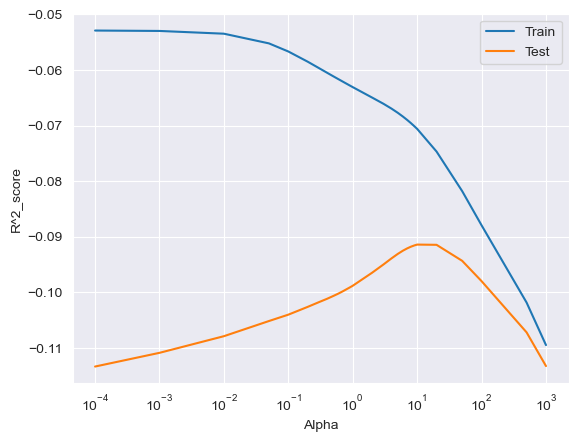

In [57]:
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('Alpha')
plt.ylabel('R^2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [58]:
#now let us do lasso model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

lassoCross = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCross.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
lassoCross.best_params_

{'alpha': 0.001}

In [62]:
lassoCross.cv_results_

{'mean_fit_time': array([0.60930643, 0.21519494, 0.0981225 , 0.03606443, 0.04570675,
        0.03282599, 0.02624292, 0.02675214, 0.03024678, 0.0259717 ,
        0.0362771 , 0.02644572, 0.04584832, 0.02614365, 0.02724824,
        0.02525573, 0.02420783, 0.0243885 , 0.02871323, 0.03544288,
        0.03323641, 0.02820678, 0.03282046, 0.02984862, 0.02908745,
        0.02583404, 0.03269205, 0.02816429]),
 'std_fit_time': array([0.19039775, 0.0481731 , 0.04359206, 0.00863861, 0.02557705,
        0.00691888, 0.00184455, 0.00155983, 0.00321409, 0.00298076,
        0.01691727, 0.00337306, 0.02403702, 0.00347346, 0.00531422,
        0.00244158, 0.00399494, 0.00942201, 0.0065023 , 0.01122548,
        0.00273343, 0.00263549, 0.00878117, 0.00206865, 0.00363117,
        0.0016999 , 0.00798286, 0.0013166 ]),
 'mean_score_time': array([0.00814614, 0.00884581, 0.02958784, 0.00881753, 0.00974898,
        0.01281576, 0.00855479, 0.01007576, 0.01188016, 0.01103582,
        0.00950975, 0.00881777, 0.008311

In [68]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
lasso.coef_

array([-9.45304206e-03,  1.38227464e-02,  3.19987532e-02,  0.00000000e+00,
       -0.00000000e+00,  2.60076548e-03,  0.00000000e+00,  1.15946975e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.16147340e-01,
        2.62989061e-02,  2.15964194e-03,  2.12481564e-02,  1.42815515e-02,
        3.10850343e-03, -2.43815855e-02,  2.08713676e-02,  2.28887568e-02,
        5.16661973e-02,  5.19479703e-03,  1.38480663e-02,  1.80299572e-03,
        5.93271557e-03,  7.30675368e-03,  1.55074840e-02, -8.69925696e-03,
       -0.00000000e+00,  4.66275935e-05, -4.14377209e-02, -7.44438487e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -3.24512358e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -7.65411049e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.41352266e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.21662430e-02, -

In [69]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R^2 (Train) = 0.90
R^2 (Test) = 0.88
RSS (Train) = 17.16
RSS (Test) = 6.43
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.12
RMSE (Test) = 0.15


In [71]:
#our R2 values look good since they are close to 1 and the other values look okay as well so now let's commit to a dataframe
lassoCross_results= pd.DataFrame(lassoCross.cv_results_)
lassoCross_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.609306      0.190398         0.008146        0.000175      0.0001   
1        0.215195      0.048173         0.008846        0.001638       0.001   
2        0.098123      0.043592         0.029588        0.022986        0.01   
3        0.036064      0.008639         0.008818        0.001605        0.05   
4        0.045707      0.025577         0.009749        0.003145         0.1   
5        0.032826      0.006919         0.012816        0.009612         0.2   
6        0.026243      0.001845         0.008555        0.000785         0.3   
7        0.026752      0.001560         0.010076        0.003550         0.4   
8        0.030247      0.003214         0.011880        0.002567         0.5   
9        0.025972      0.002981         0.011036        0.006670         0.6   
10       0.036277      0.016917         0.009510        0.001756         0.7   
11       0.026446      0.003373         0.008818        0.001610         0.8   
12       0.045848      0.024037         0.008312        0.004428         0.9   
13       0.026144      0.003473         0.010416        0.001965         1.0   
14       0.027248      0.005314         0.008828        0.003015         2.0   
15       0.025256      0.002442         0.007469        0.004325         3.0   
16       0.024208      0.003995         0.012952        0.004103         4.0   
17       0.024389      0.009422         0.011713        0.004789         5.0   
18       0.028713      0.006502         0.006946        0.006195         6.0   
19       0.035443      0.011225         0.010574        0.006149         7.0   
20       0.033236      0.002733         0.008794        0.001705         8.0   
21       0.028207      0.002635         0.009989        0.002460         9.0   
22       0.032820      0.008781         0.009491        0.001966        10.0   
23       0.029849      0.002069         0.013936        0.008237          20   
24       0.029087      0.003631         0.012390        0.006216          50   
25       0.025834      0.001700         0.009654        0.001799         100   
26       0.032692      0.007983         0.009560        0.002465         500   
27       0.028164      0.001317         0.008101        0.000544        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.090400          -0.090038   
1    {'alpha': 0.001}          -0.087054          -0.090236   
2     {'alpha': 0.01}          -0.110744          -0.124130   
3     {'alpha': 0.05}          -0.126332          -0.146910   
4      {'alpha': 0.1}          -0.152920          -0.175308   
5      {'alpha': 0.2}          -0.243363          -0.250502   
6      {'alpha': 0.3}          -0.295262          -0.299878   
7      {'alpha': 0.4}          -0.295262          -0.299878   
8      {'alpha': 0.5}          -0.295262          -0.299878   
9      {'alpha': 0.6}          -0.295262          -0.299878   
10     {'alpha': 0.7}          -0.295262          -0.299878   
11     {'alpha': 0.8}          -0.295262          -0.299878   
12     {'alpha': 0.9}          -0.295262          -0.299878   
13     {'alpha': 1.0}          -0.295262          -0.299878   
14     {'alpha': 2.0}          -0.295262          -0.299878   
15     {'alpha': 3.0}          -0.295262          -0.299878   
16     {'alpha': 4.0}          -0.295262          -0.299878   
17     {'alpha': 5.0}          -0.295262          -0.299878   
18     {'alpha': 6.0}          -0.295262          -0.299878   
19     {'alpha': 7.0}          -0.295262          -0.299878   
20     {'alpha': 8.0}          -0.295262          -0.299878   
21     {'alpha': 9.0}          -0.295262          -0.299878   
22    {'alpha': 10.0}          -0.295262          -0.299878   
23      {'alpha': 20}          -0.295262          -0.299878   
24      {'alpha': 50}          -0.295262          -0.299878   
25     {'alpha': 100}          -0.295262     

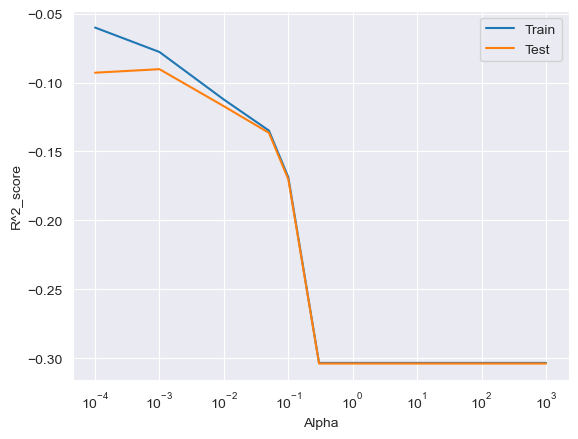

In [73]:
plt.plot(lassoCross_results['param_alpha'], lassoCross_results['mean_train_score'], label='Train')
plt.plot(lassoCross_results['param_alpha'], lassoCross_results['mean_test_score'], label='Test')
plt.xlabel('Alpha')
plt.ylabel('R^2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [101]:
#since the R^2 score on ridge regression and lasso model is close to each other .92 and .90 respectively
#now let's compare coefficents of ridge and lasso across variables
Bcoeff = pd.DataFrame(index=X.columns)
Bcoeff.rows = X.columns
Bcoeff['Ridge'] = ridge.coef_
Bcoeff['Lasso'] = lasso.coef_
Bcoeff

Ridge     Lasso
LotFrontage           -1.046520e-02 -0.004135
LotArea                1.617495e-02  0.012602
YearRemodAdd           3.007310e-02  0.037721
MasVnrArea             3.371510e-03  0.000000
BsmtFinSF1            -9.020999e-04  0.000000
BsmtFinSF2             7.244376e-03  0.000000
BsmtUnfSF              2.880308e-03  0.000000
TotalBsmtSF            4.578704e-03  0.025243
1stFlrSF               3.431187e-02  0.005681
2ndFlrSF               4.250041e-02  0.000000
LowQualFinSF           4.341575e-03 -0.000000
GrLivArea              6.131845e-02  0.107007
BsmtFullBath           2.430027e-02  0.026273
BsmtHalfBath           2.054838e-03  0.001670
FullBath               2.372170e-02  0.020997
HalfBath               1.710609e-02  0.010746
BedroomAbvGr           7.765007e-03  0.000067
KitchenAbvGr          -1.988197e-02 -0.027514
TotRmsAbvGrd           2.340963e-02  0.022637
Fireplaces             1.954038e-02  0.028694
GarageCars             4.342616e-02  0.057090
GarageArea             7.995340e-03  0.009281
WoodDeckSF             1.461175e-02  0.012156
OpenPorchSF            2.194071e-03  0.000549
EnclosedPorch          7.339285e-03  0.003695
3SsnPorch              8.230634e-03  0.006356
ScreenPorch            1.629980e-02  0.016082
PoolArea              -7.840573e-03 -0.011157
MiscVal                2.001175e-04  0.000000
MoSold                 1.145346e-03  0.000000
Age                   -4.609424e-02 -0.034885
MSSubClass_30         -6.922608e-02 -0.044469
MSSubClass_40          7.284814e-03  0.000000
MSSubClass_45          8.085159e-04  0.000000
MSSubClass_50          1.105139e-03 -0.000000
MSSubClass_60         -2.327415e-02 -0.000858
MSSubClass_70          3.999994e-02  0.000000
MSSubClass_75          2.010391e-02  0.000000
MSSubClass_80          4.111325e-03  0.000000
MSSubClass_85          2.878735e-03 -0.000000
MSSubClass_90         -2.208915e-03 -0.000000
MSSubClass_120        -1.412099e-02 -0.000000
MSSubClass_160        -6.299176e-02 -0.059081
MSSubClass_180        -1.791955e-02 -0.000000
MSSubClass_190         1.847317e-03  0.000000
MSZoning_FV            2.902338e-02  0.000000
MSZoning_RH            1.225314e-02  0.000000
MSZoning_RL            2.646890e-02  0.000000
MSZoning_RM           -2.413925e-02 -0.048455
Street_Pave            5.513671e-03  0.000000
Alley_None            -6.200543e-03 -0.000000
Alley_Pave             1.598409e-02  0.000000
LotShape_IR2           2.561731e-02  0.000000
LotShape_IR3          -3.340016e-02 -0.000000
LotShape_Reg           2.901356e-03 -0.000000
LandContour_HLS        4.876450e-02  0.000000
LandContour_Low        6.725497e-03 -0.000000
LandContour_Lvl        3.357716e-02  0.000000
Utilities_NoSeWa      -7.962250e-03 -0.000000
LotConfig_CulDSac      3.611174e-02  0.031484
LotConfig_FR2         -2.372874e-02 -0.000000
LotConfig_FR3         -5.931043e-03 -0.000000
LotConfig_Inside      -1.015755e-02 -0.000000
LandSlope_Mod         -6.904725e-03 -0.000000
LandSlope_Sev         -2.237935e-03  0.000000
Neighborhood_Blueste  -3.267881e-03 -0.000000
Neighborhood_BrDale   -8.658585e-03 -0.000000
Neighborhood_BrkSide   2.014444e-02  0.000000
Neighborhood_ClearCr   2.356837e-02  0.000000
Neighborhood_CollgCr  -1.336576e-02 -0.000000
Neighborhood_Crawfor   7.041119e-02  0.074540
Neighborhood_Edwards  -5.647567e-02 -0.038825
Neighborhood_Gilbert  -2.787553e-02 -0.000000
Neighborhood_IDOTRR   -1.769094e-02 -0.000000
Neighborhood_MeadowV  -5.313015e-02 -0.000000
Neighborhood_Mitchel  -2.362962e-02 -0.000000
Neighborhood_NAmes    -1.691782e-02 -0.000000
Neighborhood_NPkVill   8.157473e-04 -0.000000
Neighborhood_NWAmes   -1.489013e-02 -0.000000
Neighborhood_NoRidge   3.208604e-02  0.000000
Neighborhood_NridgHt   6.778793e-02  0.044696
Neighborhood_OldTown  -2.164632e-02 -0.000000
Neighborhood_SWISU    -7.610779e-03  0.000000
Neighborhood_Sawyer   -1.731410e-02 -0.000000
Neighborhood_SawyerW  -1.098520e-02 -0.000000
Neighborhood_Somerst   3.298708e-02  0.020861
Neighborhood_StoneBr   6.281

In [102]:
Bcoeff[Bcoeff['Lasso']==0]

Ridge  Lasso
MasVnrArea             3.371510e-03    0.0
BsmtFinSF1            -9.020999e-04    0.0
BsmtFinSF2             7.244376e-03    0.0
BsmtUnfSF              2.880308e-03    0.0
2ndFlrSF               4.250041e-02    0.0
LowQualFinSF           4.341575e-03   -0.0
MiscVal                2.001175e-04    0.0
MoSold                 1.145346e-03    0.0
MSSubClass_40          7.284814e-03    0.0
MSSubClass_45          8.085159e-04    0.0
MSSubClass_50          1.105139e-03   -0.0
MSSubClass_70          3.999994e-02    0.0
MSSubClass_75          2.010391e-02    0.0
MSSubClass_80          4.111325e-03    0.0
MSSubClass_85          2.878735e-03   -0.0
MSSubClass_90         -2.208915e-03   -0.0
MSSubClass_120        -1.412099e-02   -0.0
MSSubClass_180        -1.791955e-02   -0.0
MSSubClass_190         1.847317e-03    0.0
MSZoning_FV            2.902338e-02    0.0
MSZoning_RH            1.225314e-02    0.0
MSZoning_RL            2.646890e-02    0.0
Street_Pave            5.513671e-03    0.0
Alley_None            -6.200543e-03   -0.0
Alley_Pave             1.598409e-02    0.0
LotShape_IR2           2.561731e-02    0.0
LotShape_IR3          -3.340016e-02   -0.0
LotShape_Reg           2.901356e-03   -0.0
LandContour_HLS        4.876450e-02    0.0
LandContour_Low        6.725497e-03   -0.0
LandContour_Lvl        3.357716e-02    0.0
Utilities_NoSeWa      -7.962250e-03   -0.0
LotConfig_FR2         -2.372874e-02   -0.0
LotConfig_FR3         -5.931043e-03   -0.0
LotConfig_Inside      -1.015755e-02   -0.0
LandSlope_Mod         -6.904725e-03   -0.0
LandSlope_Sev         -2.237935e-03    0.0
Neighborhood_Blueste  -3.267881e-03   -0.0
Neighborhood_BrDale   -8.658585e-03   -0.0
Neighborhood_BrkSide   2.014444e-02    0.0
Neighborhood_ClearCr   2.356837e-02    0.0
Neighborhood_CollgCr  -1.336576e-02   -0.0
Neighborhood_Gilbert  -2.787553e-02   -0.0
Neighborhood_IDOTRR   -1.769094e-02   -0.0
Neighborhood_MeadowV  -5.313015e-02   -0.0
Neighborhood_Mitchel  -2.362962e-02   -0.0
Neighborhood_NAmes    -1.691782e-02   -0.0
Neighborhood_NPkVill   8.157473e-04   -0.0
Neighborhood_NWAmes   -1.489013e-02   -0.0
Neighborhood_NoRidge   3.208604e-02    0.0
Neighborhood_OldTown  -2.164632e-02   -0.0
Neighborhood_SWISU    -7.610779e-03    0.0
Neighborhood_Sawyer   -1.731410e-02   -0.0
Neighborhood_SawyerW  -1.098520e-02   -0.0
Neighborhood_StoneBr   6.281550e-02    0.0
Neighborhood_Timber   -7.341336e-04    0.0
Neighborhood_Veenker   1.512946e-02    0.0
Condition1_Feedr      -7.931099e-03   -0.0
Condition1_PosA        5.531727e-03    0.0
Condition1_PosN       -1.111207e-02   -0.0
Condition1_RRAe       -1.968820e-02   -0.0
Condition1_RRAn        1.446377e-02    0.0
Condition1_RRNe        1.547487e-03    0.0
Condition1_RRNn        5.847909e-03    0.0
Condition2_Feedr       4.120265e-03   -0.0
Condition2_Norm        2.363851e-02    0.0
Condition2_PosA        1.648149e-02    0.0
Condition2_PosN       -3.597236e-02   -0.0
Condition2_RRAe       -3.871395e-03   -0.0
Condition2_RRAn       -1.286232e-05   -0.0
Condition2_RRNn        2.417097e-03    0.0
BldgType_2fmCon        3.102066e-03    0.0
BldgType_Duplex       -2.208915e-03   -0.0
BldgType_Twnhs        -5.239617e-02   -0.0
BldgType_TwnhsE       -4.263613e-02   -0.0
HouseStyle_1.5Unf      8.489911e-03    0.0
HouseStyle_1Story      2.969371e-02    0.0
HouseStyle_2.5Fin     -6.344233e-03   -0.0
HouseStyle_2.5Unf      1.338756e-02    0.0
HouseStyle_2Story     -2.298264e-02   -0.0
HouseStyle_SFoyer     -7.789772e-03   -0.0
HouseStyle_SLvl        1.165056e-03    0.0
OverallQual_2         -9.857608e-03   -0.0
OverallQual_6         -6.973759e-03    0.0
OverallQual_10         1.074088e-02    0.0
OverallCond_2         -5.300979e-03   -0.0
OverallCond_6          1.941168e-02    0.0
OverallCond_8          4.087108e-02    0.0
OverallCond_9          5.197510e-02    0.0
RoofStyle_Gambrel      1.904960e-03    0.0
RoofStyle_Hip         -1.288374e-02    0.0
RoofStyle_Mansard      1.153762e-02    0.0
RoofStyle_Shed         4.011878

In [77]:
Bcoeff[Bcoeff['Lasso']==0].shape

(289, 2)

In [103]:
#289 features out of 384 were selected by lasso, now view those variables
Bcoeff.loc[Bcoeff['Lasso']!=0, 'Lasso']

LotFrontage             -0.004135
LotArea                  0.012602
YearRemodAdd             0.037721
TotalBsmtSF              0.025243
1stFlrSF                 0.005681
GrLivArea                0.107007
BsmtFullBath             0.026273
BsmtHalfBath             0.001670
FullBath                 0.020997
HalfBath                 0.010746
BedroomAbvGr             0.000067
KitchenAbvGr            -0.027514
TotRmsAbvGrd             0.022637
Fireplaces               0.028694
GarageCars               0.057090
GarageArea               0.009281
WoodDeckSF               0.012156
OpenPorchSF              0.000549
EnclosedPorch            0.003695
3SsnPorch                0.006356
ScreenPorch              0.016082
PoolArea                -0.011157
Age                     -0.034885
MSSubClass_30           -0.044469
MSSubClass_60           -0.000858
MSSubClass_160          -0.059081
MSZoning_RM             -0.048455
LotConfig_CulDSac        0.031484
Neighborhood_Crawfor     0.074540
Neighborhood_E

In [104]:
#now view the top 15 featues
Bcoeff['Ridge'].sort_values(ascending=False)[:15]

OverallQual_9           0.100129
OverallQual_8           0.071467
Neighborhood_Crawfor    0.070411
Neighborhood_NridgHt    0.067788
CentralAir_Y            0.062891
Neighborhood_StoneBr    0.062816
Functional_Typ          0.061949
GrLivArea               0.061318
Exterior1st_BrkFace     0.060103
BsmtCond_TA             0.056340
OverallCond_9           0.051975
LandContour_HLS         0.048764
OverallCond_7           0.044717
GarageCars              0.043426
2ndFlrSF                0.042500
Name: Ridge, dtype: float64

In [105]:
#need to take the inverse log to understand lasso coefficents
ridge_coeffs = np.exp(Bcoeff['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:15]

OverallQual_9           1.105313
OverallQual_8           1.074082
Neighborhood_Crawfor    1.072949
Neighborhood_NridgHt    1.070138
CentralAir_Y            1.064911
Neighborhood_StoneBr    1.064830
Functional_Typ          1.063909
GrLivArea               1.063237
Exterior1st_BrkFace     1.061946
BsmtCond_TA             1.057957
OverallCond_9           1.053350
LandContour_HLS         1.049973
OverallCond_7           1.045732
GarageCars              1.044383
2ndFlrSF                1.043416
Name: Ridge, dtype: float64

In [106]:
Bcoeff['Lasso'].sort_values(ascending=False)[:15]

OverallQual_9           0.159031
GrLivArea               0.107007
OverallQual_8           0.098249
Neighborhood_Crawfor    0.074540
Functional_Typ          0.072462
CentralAir_Y            0.070772
GarageCars              0.057090
Exterior1st_BrkFace     0.048741
Neighborhood_NridgHt    0.044696
Condition1_Norm         0.041073
YearRemodAdd            0.037721
LotConfig_CulDSac       0.031484
BsmtCond_TA             0.031327
Fireplaces              0.028694
Foundation_PConc        0.027235
Name: Lasso, dtype: float64

In [107]:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:15]

OverallQual_9           1.194342
GrLivArea               1.123161
OverallQual_8           1.109610
Neighborhood_Crawfor    1.099982
Neighborhood_NridgHt    1.093207
Exterior1st_BrkFace     1.082976
Neighborhood_StoneBr    1.079281
Functional_Typ          1.077411
CentralAir_Y            1.076985
BsmtCond_TA             1.065437
Neighborhood_Somerst    1.053601
GarageCars              1.053024
Condition1_Norm         1.049099
BsmtExposure_Gd         1.046667
LotConfig_CulDSac       1.043487
Name: Lasso, dtype: float64

In [89]:
#so the best variables are OverallQual_9 If the house is rated excellent, the price will increase by 1.9
#GrLivArea If the house is above ground, the price will increase by 1.1
#OverallQual_8 If the house is rated very good, the price will increase by 1.1
#Neighborhood_Crawfor If the house is in Crawford, Ames, the price will increase 1.1
#Neighborhood_NridgHt If the house is in Northridge Heights, Ames, the price will increase   1.09
#Exterior1st_BrkFace If the house has a brick face, the price will increase 1.08
#Neighborhood_StoneBr If the house is in Stone Brook, Ames, the price will increase 1.08
#Functional_Typ If the house has typical functionality, the price will increase 1.08
#CentralAir_Y If the house has central air conditioning, the price will increase 1.08
#BsmtCond_TA If the house has a typical basement, the price will increase 1.06
#Neighborhood_Somerst If the house is in Somserset, Ames, the price will increase 1.05
#GarageCars If the house has a larger size garage in car capacity, the price will increase 1.05
#Condition1_Norm If the house has a normal proximity to various conditions, the price will increase 1.05
#BsmtExposure_Gd If the house has good exposure to walkout or garden level walls, the price will increase 1.05
#LotConfig_CulDSac If the house has a cul-de-sac, the price will increase 1.04
#and the optimal value of lambda for ridge regression is 10 and lasso regression is .001

In [110]:
#Coding for question 3
bad5 = ['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt']
X_train_dropped = X_train.drop(bad5, axis=1)
X_test_dropped = X_test.drop(bad5, axis=1)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCross = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCross.fit(X_train_dropped, y_train) 
lassoCross.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


{'alpha': 0.0001}

In [114]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_dropped, y_train)
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R^2 (Train) = 0.90
R^2 (Test) = 0.87
RSS (Train) = 18.49
RSS (Test) = 6.95
MSE (Train) = 0.02
MSE (Test) = 0.02
RMSE (Train) = 0.13
RMSE (Test) = 0.15


In [115]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

Lasso Regression
Metric                            
R2 Score (Train)          0.896183
R2 Score (Test)           0.872421
RSS (Train)              18.485186
RSS (Test)                6.951929
MSE (Train)               0.015826
MSE (Test)                0.023808
RMSE (Train)              0.125803
RMSE (Test)               0.154298

In [116]:
BCoeff = pd.DataFrame(index=X_train_dropped.columns)
BCoeff.rows = X_train_dropped.columns
BCoeff['Lasso'] = lasso.coef_
BCoeff['Lasso'].sort_values(ascending=False)[:5]

Exterior1st_BrkFace    0.091095
2ndFlrSF               0.090993
1stFlrSF               0.081430
Functional_Typ         0.080675
BsmtCond_TA            0.075369
Name: Lasso, dtype: float64

In [90]:
#Coding for question 1
#What is the optimal value of alpha for ridge and lasso regression? 
#What will be the changes in the model if you choose double the value of alpha 
#for both ridge and lasso? 
#What will be the most important predictor variables after the change is implemented?
#best value for ridge regression is 10
#best value for lasso regression is .001

#If we want to double it let us actually do it on ridge
ridge = Ridge(alpha=20)

# Fit the model on training data
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R^2 (Train) = 0.92
R^2 (Test) = 0.89
RSS (Train) = 15.04
RSS (Test) = 6.05
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.11
RMSE (Test) = 0.14


In [91]:
#let us do it on lasso now
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R^2 (Train) = 0.88
R^2 (Test) = 0.87
RSS (Train) = 20.85
RSS (Test) = 7.09
MSE (Train) = 0.02
MSE (Test) = 0.02
RMSE (Train) = 0.13
RMSE (Test) = 0.16


In [93]:
lr_table = {'Metric': ['R^2 Score (Train)','R^2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                               
R^2 Score (Train)          0.915551          0.882902
R^2 Score (Test)           0.888895          0.869974
RSS (Train)               15.036588         20.849919
RSS (Test)                 6.054215          7.085255
MSE (Train)                0.012874          0.017851
MSE (Test)                 0.020734          0.024265
RMSE (Train)               0.113463          0.133607
RMSE (Test)                0.143992          0.155771

In [94]:
#so the R2 score did not change as it went from .92 to .92 with doubling the lambda value for train ridge regression
#the R2 score did not really change for the test ridge regression as it went from .89 to .88
#the R2 score changed from .90 to .88  with doubling the lambda value for train lasso regression
#the R2 score changed from 0.88 to .86 an for the test lasso regression 

In [96]:
Bcoeff = pd.DataFrame(index=X.columns)
Bcoeff.rows = X.columns
Bcoeff['Ridge'] = ridge.coef_
Bcoeff['Lasso'] = lasso.coef_
Bcoeff

Ridge     Lasso
LotFrontage           -1.046520e-02 -0.004135
LotArea                1.617495e-02  0.012602
YearRemodAdd           3.007310e-02  0.037721
MasVnrArea             3.371510e-03  0.000000
BsmtFinSF1            -9.020999e-04  0.000000
BsmtFinSF2             7.244376e-03  0.000000
BsmtUnfSF              2.880308e-03  0.000000
TotalBsmtSF            4.578704e-03  0.025243
1stFlrSF               3.431187e-02  0.005681
2ndFlrSF               4.250041e-02  0.000000
LowQualFinSF           4.341575e-03 -0.000000
GrLivArea              6.131845e-02  0.107007
BsmtFullBath           2.430027e-02  0.026273
BsmtHalfBath           2.054838e-03  0.001670
FullBath               2.372170e-02  0.020997
HalfBath               1.710609e-02  0.010746
BedroomAbvGr           7.765007e-03  0.000067
KitchenAbvGr          -1.988197e-02 -0.027514
TotRmsAbvGrd           2.340963e-02  0.022637
Fireplaces             1.954038e-02  0.028694
GarageCars             4.342616e-02  0.057090
GarageArea             7.995340e-03  0.009281
WoodDeckSF             1.461175e-02  0.012156
OpenPorchSF            2.194071e-03  0.000549
EnclosedPorch          7.339285e-03  0.003695
3SsnPorch              8.230634e-03  0.006356
ScreenPorch            1.629980e-02  0.016082
PoolArea              -7.840573e-03 -0.011157
MiscVal                2.001175e-04  0.000000
MoSold                 1.145346e-03  0.000000
Age                   -4.609424e-02 -0.034885
MSSubClass_30         -6.922608e-02 -0.044469
MSSubClass_40          7.284814e-03  0.000000
MSSubClass_45          8.085159e-04  0.000000
MSSubClass_50          1.105139e-03 -0.000000
MSSubClass_60         -2.327415e-02 -0.000858
MSSubClass_70          3.999994e-02  0.000000
MSSubClass_75          2.010391e-02  0.000000
MSSubClass_80          4.111325e-03  0.000000
MSSubClass_85          2.878735e-03 -0.000000
MSSubClass_90         -2.208915e-03 -0.000000
MSSubClass_120        -1.412099e-02 -0.000000
MSSubClass_160        -6.299176e-02 -0.059081
MSSubClass_180        -1.791955e-02 -0.000000
MSSubClass_190         1.847317e-03  0.000000
MSZoning_FV            2.902338e-02  0.000000
MSZoning_RH            1.225314e-02  0.000000
MSZoning_RL            2.646890e-02  0.000000
MSZoning_RM           -2.413925e-02 -0.048455
Street_Pave            5.513671e-03  0.000000
Alley_None            -6.200543e-03 -0.000000
Alley_Pave             1.598409e-02  0.000000
LotShape_IR2           2.561731e-02  0.000000
LotShape_IR3          -3.340016e-02 -0.000000
LotShape_Reg           2.901356e-03 -0.000000
LandContour_HLS        4.876450e-02  0.000000
LandContour_Low        6.725497e-03 -0.000000
LandContour_Lvl        3.357716e-02  0.000000
Utilities_NoSeWa      -7.962250e-03 -0.000000
LotConfig_CulDSac      3.611174e-02  0.031484
LotConfig_FR2         -2.372874e-02 -0.000000
LotConfig_FR3         -5.931043e-03 -0.000000
LotConfig_Inside      -1.015755e-02 -0.000000
LandSlope_Mod         -6.904725e-03 -0.000000
LandSlope_Sev         -2.237935e-03  0.000000
Neighborhood_Blueste  -3.267881e-03 -0.000000
Neighborhood_BrDale   -8.658585e-03 -0.000000
Neighborhood_BrkSide   2.014444e-02  0.000000
Neighborhood_ClearCr   2.356837e-02  0.000000
Neighborhood_CollgCr  -1.336576e-02 -0.000000
Neighborhood_Crawfor   7.041119e-02  0.074540
Neighborhood_Edwards  -5.647567e-02 -0.038825
Neighborhood_Gilbert  -2.787553e-02 -0.000000
Neighborhood_IDOTRR   -1.769094e-02 -0.000000
Neighborhood_MeadowV  -5.313015e-02 -0.000000
Neighborhood_Mitchel  -2.362962e-02 -0.000000
Neighborhood_NAmes    -1.691782e-02 -0.000000
Neighborhood_NPkVill   8.157473e-04 -0.000000
Neighborhood_NWAmes   -1.489013e-02 -0.000000
Neighborhood_NoRidge   3.208604e-02  0.000000
Neighborhood_NridgHt   6.778793e-02  0.044696
Neighborhood_OldTown  -2.164632e-02 -0.000000
Neighborhood_SWISU    -7.610779e-03  0.000000
Neighborhood_Sawyer   -1.731410e-02 -0.000000
Neighborhood_SawyerW  -1.098520e-02 -0.000000
Neighborhood_Somerst   3.298708e-02  0.020861
Neighborhood_StoneBr   6.281

In [97]:
Bcoeff['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           0.100129
OverallQual_8           0.071467
Neighborhood_Crawfor    0.070411
Neighborhood_NridgHt    0.067788
CentralAir_Y            0.062891
Neighborhood_StoneBr    0.062816
Functional_Typ          0.061949
GrLivArea               0.061318
Exterior1st_BrkFace     0.060103
BsmtCond_TA             0.056340
Name: Ridge, dtype: float64

In [98]:
ridge_coeffs = np.exp(Bcoeff['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]
Bcoeff['Lasso'].sort_values(ascending=False)[:10]


OverallQual_9           0.159031
GrLivArea               0.107007
OverallQual_8           0.098249
Neighborhood_Crawfor    0.074540
Functional_Typ          0.072462
CentralAir_Y            0.070772
GarageCars              0.057090
Exterior1st_BrkFace     0.048741
Neighborhood_NridgHt    0.044696
Condition1_Norm         0.041073
Name: Lasso, dtype: float64

In [99]:
lasso_coeffs = np.exp(Bcoeff['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.172375
GrLivArea               1.112942
OverallQual_8           1.103237
Neighborhood_Crawfor    1.077388
Functional_Typ          1.075152
CentralAir_Y            1.073336
GarageCars              1.058751
Exterior1st_BrkFace     1.049948
Neighborhood_NridgHt    1.045710
Condition1_Norm         1.041928
Name: Lasso, dtype: float64

In [100]:
#so the most important predictor values after you double the value is
#OverallQual_9           1.172375
#GrLivArea               1.112942
#OverallQual_8           1.103237
#Neighborhood_Crawfor    1.077388
#Functional_Typ          1.075152
#CentralAir_Y            1.073336
#GarageCars              1.058751
#Exterior1st_BrkFace     1.049948
#Neighborhood_NridgHt    1.045710
#Condition1_Norm         1.041928 